In [32]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# Загружаем библиотеки.
import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import platform
import seaborn as sns
import sklearn
import tensorflow as tf
from scipy import stats

from lazypredict.Supervised import LazyRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Ridge, Lasso, ElasticNetCV, BayesianRidge, LassoLars, ElasticNet, QuantileRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
#from xgboost import XGBQuantileRegressor

In [37]:
pip freeze > requirements.txt # сохранение версий библиотек в файл

In [38]:
#Загружаем первый датасет и смотрим первые 5 строк.
df1 = pd.read_excel('X_bp.xlsx')
df1.head()


Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0           0                             1.86           2030.00   
1           1                             1.86           2030.00   
2           2                             1.86           2030.00   
3           3                             1.86           2030.00   
4           4                             2.77           2030.00   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0                 738.74                        30.00   
1                 738.74                        50.00   
2                 738.74                        49.90   
3                 738.74                       129.00   
4                 753.00                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                            22.27                    100.00   
1                            23.75                    284.62   
2                            33.00                    284.62   
3                            21.25                    300.00   
4                            22.27                    284.62   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                         210.00                                 70.00   
1                         210.00                                 70.00   
2                         210.00                                 70.00   
3                         210.00                                 70.00   
4                         210.00                                 70.00   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                        3000.00                   220.00  
1                        3000.00                   220.00  
2                        3000.00                   220.00  
3                        3000.00                   220.00  
4                        3000.00                   220.00

In [39]:
#Загружаем второй датасет и смотрим первые 5 строк.
df2 = pd.read_excel('X_nup.xlsx')
df2.head()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0           0                   0         4.00              57.00
1           1                   0         4.00              60.00
2           2                   0         4.00              70.00
3           3                   0         5.00              47.00
4           4                   0         5.00              57.00

In [40]:
# Смотрим размерность датасетов. 
print(df1.shape) #1023 строки и 11 столбцов
print(df2.shape) #1040 строки и 4 столбца

(1023, 11)
(1040, 4)


In [41]:
# Объединяем датасеты по индексу, тип объединения inner.
df = df1.merge(df2, left_index=True, right_index=True, how='inner')
df.head()

Unnamed: 0_x  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0             0                             1.86           2030.00   
1             1                             1.86           2030.00   
2             2                             1.86           2030.00   
3             3                             1.86           2030.00   
4             4                             2.77           2030.00   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0                 738.74                        30.00   
1                 738.74                        50.00   
2                 738.74                        49.90   
3                 738.74                       129.00   
4                 753.00                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                            22.27                    100.00   
1                            23.75                    284.62   
2                            33.00                    284.62   
3                            21.25                    300.00   
4                            22.27                    284.62   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                         210.00                                 70.00   
1                         210.00                                 70.00   
2                         210.00                                 70.00   
3                         210.00                                 70.00   
4                         210.00                                 70.00   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  Unnamed: 0_y  \
0                        3000.00                   220.00             0   
1                        3000.00                   220.00             1   
2                        3000.00                   220.00             2   
3                        3000.00                   220.00             3   
4                        3000.00                   220.00             4   

   Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                   0         4.00              57.00  
1                   0         4.00              60.00  
2                   0         4.00              70.00  
3                   0         5.00              47.00  
4                   0         5.00              57.00

In [42]:
# Удаляем неинформативные столбцы 'Unnamed: 0_x' и 'Unnamed: 0_y'.
df = df.drop(df.columns[[0, 11]], axis=1)
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                             1.86           2030.00                 738.74   
1                             1.86           2030.00                 738.74   
2                             1.86           2030.00                 738.74   
3                             1.86           2030.00                 738.74   
4                             2.77           2030.00                 753.00   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                            22.27   
1                        50.00                            23.75   
2                        49.90                            33.00   
3                       129.00                            21.25   
4                       111.86                            22.27   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    100.00                         210.00   
1                    284.62                         210.00   
2                    284.62                         210.00   
3                    300.00                         210.00   
4                    284.62                         210.00   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                 70.00                        3000.00   
1                                 70.00                        3000.00   
2                                 70.00                        3000.00   
3                                 70.00                        3000.00   
4                                 70.00                        3000.00   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                   220.00                   0         4.00              57.00  
1                   220.00                   0         4.00              60.00  
2                   220.00                   0         4.00              70.00  
3                   220.00                   0         5.00              47.00  
4                   220.00                   0         5.00              57.00

In [43]:
# Смотрим размерность датасета.
df.shape

(1023, 13)

In [44]:
# Смотрим тип данных и количество значений в датасете.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [45]:
# Проверяем есть ли пропущенные значения в датасете. Нулевые значения отсутствуют.
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [46]:
# Посмотрим описательную статистику.
df.describe().T

count    mean    std     min     25%  \
Соотношение матрица-наполнитель      1023.00    2.93   0.91    0.39    2.32   
Плотность, кг/м3                     1023.00 1975.73  73.73 1731.76 1924.16   
модуль упругости, ГПа                1023.00  739.92 330.23    2.44  500.05   
Количество отвердителя, м.%          1023.00  110.57  28.30   17.74   92.44   
Содержание эпоксидных групп,%_2      1023.00   22.24   2.41   14.25   20.61   
Температура вспышки, С_2             1023.00  285.88  40.94  100.00  259.07   
Поверхностная плотность, г/м2        1023.00  482.73 281.31    0.60  266.82   
Модуль упругости при растяжении, ГПа 1023.00   73.33   3.12   64.05   71.25   
Прочность при растяжении, МПа        1023.00 2466.92 485.63 1036.86 2135.85   
Потребление смолы, г/м2              1023.00  218.42  59.74   33.80  179.63   
Угол нашивки, град                   1023.00   44.25  45.02    0.00    0.00   
Шаг нашивки                          1023.00    6.90   2.56    0.00    5.08   
Плотность нашивки                    1023.00   57.15  12.35    0.00   49.80   

                                         50%     75%     max  
Соотношение матрица-наполнитель         2.91    3.55    5.59  
Плотность, кг/м3                     1977.62 2021.37 2207.77  
модуль упругости, ГПа                 739.66  961.81 1911.54  
Количество отвердителя, м.%           110.56  129.73  198.95  
Содержание эпоксидных групп,%_2        22.23   23.96   33.00  
Температура вспышки, С_2              285.90  313.00  413.27  
Поверхностная плотность, г/м2         451.86  693.23 1399.54  
Модуль упругости при растяжении, ГПа   73.27   75.36   82.68  
Прочность при растяжении, МПа        2459.52 2767.19 3848.44  
Потребление смолы, г/м2               219.20  257.48  414.59  
Угол нашивки, град                      0.00   90.00   90.00  
Шаг нашивки                             6.92    8.59   14.44  
Плотность нашивки                      57.34   64.94  103.99

In [47]:
# Проверим датасет на наличие дубликатов.
df.duplicated().sum()#Дубликаты отсутствуют.

0

In [48]:
# Смотрим количество уникальных значений в столбцах.
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [49]:
# Вычисляем коэффициенты корреляции Пирсона. Статистической зависимости не наблюдается.
# Значение корреляции Пирсона показывает, насколько сильно две переменные взаимосвязаны, при этом учитывается только линейная связь.
df.corr(method ='pearson')

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                                  1.00   
Плотность, кг/м3                                                 0.00   
модуль упругости, ГПа                                            0.03   
Количество отвердителя, м.%                                     -0.01   
Содержание эпоксидных групп,%_2                                  0.02   
Температура вспышки, С_2                                        -0.00   
Поверхностная плотность, г/м2                                   -0.01   
Модуль упругости при растяжении, ГПа                            -0.01   
Прочность при растяжении, МПа                                    0.02   
Потребление смолы, г/м2                                          0.07   
Угол нашивки, град                                              -0.03   
Шаг нашивки                                                      0.04   
Плотность нашивки                                               -0.00   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель                   0.00                   0.03   
Плотность, кг/м3                                  1.00                  -0.01   
модуль упругости, ГПа                            -0.01                   1.00   
Количество отвердителя, м.%                      -0.04                   0.02   
Содержание эпоксидных групп,%_2                  -0.01                  -0.01   
Температура вспышки, С_2                         -0.02                   0.03   
Поверхностная плотность, г/м2                     0.04                  -0.01   
Модуль упругости при растяжении, ГПа             -0.02                   0.02   
Прочность при растяжении, МПа                    -0.07                   0.04   
Потребление смолы, г/м2                          -0.02                   0.00   
Угол нашивки, град                               -0.07                  -0.03   
Шаг нашивки                                      -0.06                  -0.01   
Плотность нашивки                                 0.08                   0.06   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                             -0.01   
Плотность, кг/м3                                            -0.04   
модуль упругости, ГПа                                        0.02   
Количество отвердителя, м.%                                  1.00   
Содержание эпоксидных групп,%_2                             -0.00   
Температура вспышки, С_2                                     0.10   
Поверхностная плотность, г/м2                                0.06   
Модуль упругости при растяжении, ГПа                        -0.07   
Прочность при растяжении, МПа                               -0.08   
Потребление смолы, г/м2                                      0.01   
Угол нашивки, град                                           0.04   
Шаг нашивки                                                  0.01   
Плотность нашивки                                            0.02   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                                  0.02   
Плотность, кг/м3                                                -0.01   
модуль упругости, ГПа                                           -0.01   
Количество отвердителя, м.%                                     -0.00   
Содержание эпоксидных групп,%_2                                  1.00   
Температура вспышки, С_2                                        -0.01   
Поверхностная плотность, г/м2                                   -0.01   
Модуль упругости при растяжении, ГПа                             0.06   
Прочность при растяжении, МПа                                   -0.02   
Потребление смолы, г/м2                                          0.02   
Угол нашивки, град                                               0.01   
Шаг нашивки                          

In [50]:
# Вычисляем коэффициенты ранговой корреляции Кендалла. Статистической зависимости не наблюдается.
# Корреляция Кендалла измеряет степень монотонной связи между двумя переменными.
df.corr(method = 'kendall')

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                                  1.00   
Плотность, кг/м3                                                -0.00   
модуль упругости, ГПа                                            0.02   
Количество отвердителя, м.%                                      0.00   
Содержание эпоксидных групп,%_2                                  0.01   
Температура вспышки, С_2                                        -0.01   
Поверхностная плотность, г/м2                                   -0.00   
Модуль упругости при растяжении, ГПа                            -0.00   
Прочность при растяжении, МПа                                    0.01   
Потребление смолы, г/м2                                          0.04   
Угол нашивки, град                                              -0.02   
Шаг нашивки                                                      0.02   
Плотность нашивки                                                0.00   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель                  -0.00                   0.02   
Плотность, кг/м3                                  1.00                  -0.01   
модуль упругости, ГПа                            -0.01                   1.00   
Количество отвердителя, м.%                      -0.02                   0.02   
Содержание эпоксидных групп,%_2                  -0.01                   0.00   
Температура вспышки, С_2                         -0.02                   0.02   
Поверхностная плотность, г/м2                     0.04                  -0.00   
Модуль упругости при растяжении, ГПа             -0.02                   0.01   
Прочность при растяжении, МПа                    -0.05                   0.02   
Потребление смолы, г/м2                          -0.02                   0.01   
Угол нашивки, град                               -0.05                  -0.03   
Шаг нашивки                                      -0.03                  -0.01   
Плотность нашивки                                 0.05                   0.05   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                              0.00   
Плотность, кг/м3                                            -0.02   
модуль упругости, ГПа                                        0.02   
Количество отвердителя, м.%                                  1.00   
Содержание эпоксидных групп,%_2                              0.00   
Температура вспышки, С_2                                     0.06   
Поверхностная плотность, г/м2                                0.03   
Модуль упругости при растяжении, ГПа                        -0.04   
Прочность при растяжении, МПа                               -0.05   
Потребление смолы, г/м2                                     -0.00   
Угол нашивки, град                                           0.02   
Шаг нашивки                                                  0.01   
Плотность нашивки                                            0.02   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                                  0.01   
Плотность, кг/м3                                                -0.01   
модуль упругости, ГПа                                            0.00   
Количество отвердителя, м.%                                      0.00   
Содержание эпоксидных групп,%_2                                  1.00   
Температура вспышки, С_2                                        -0.00   
Поверхностная плотность, г/м2                                   -0.01   
Модуль упругости при растяжении, ГПа                             0.04   
Прочность при растяжении, МПа                                   -0.01   
Потребление смолы, г/м2                                          0.01   
Угол нашивки, град                                               0.00   
Шаг нашивки                          

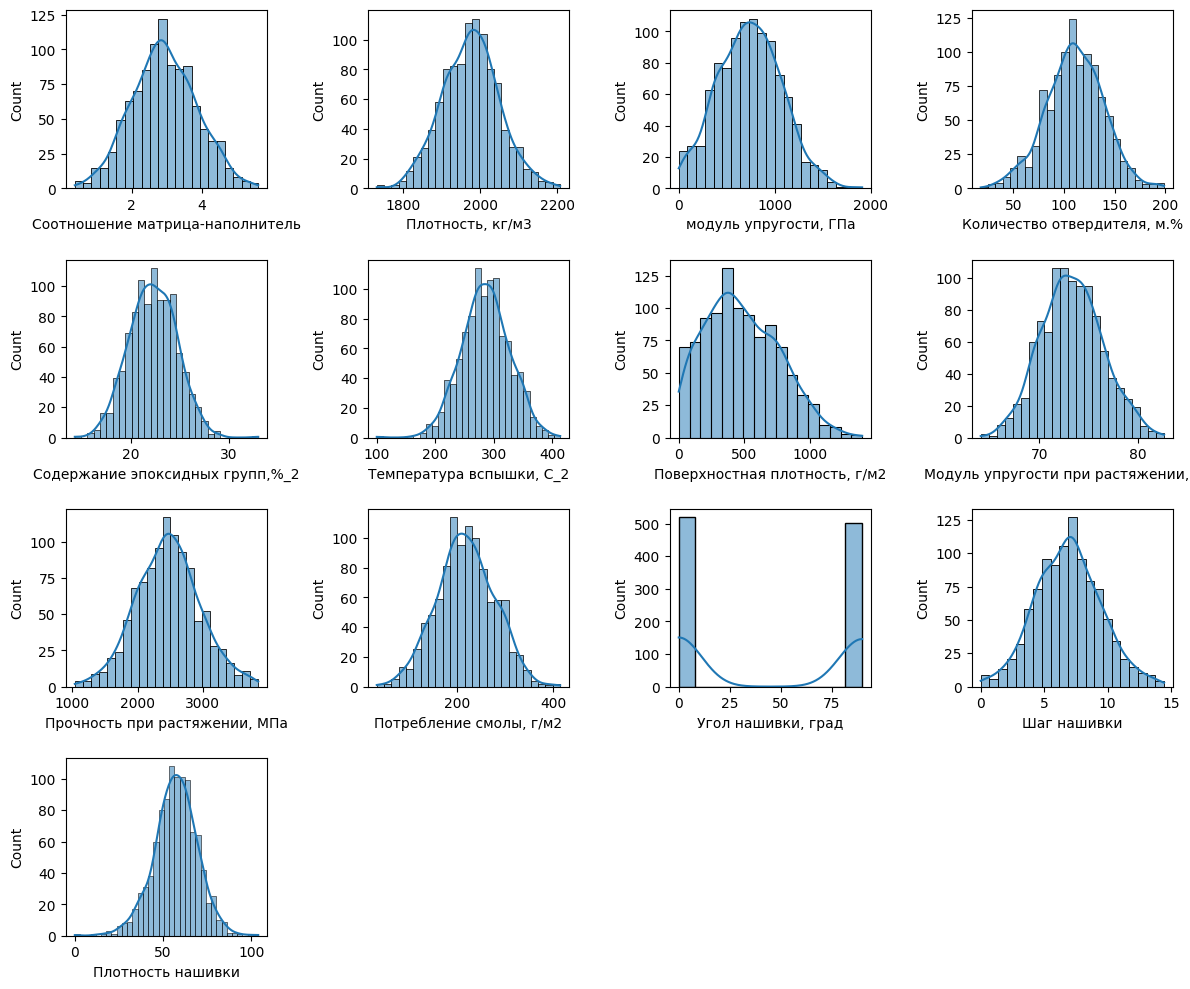

In [51]:
# Построим гистограммы распределения для каждой переменной
fig=plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    ax=fig.add_subplot(4, 4, i+1) # создаём сетку 4x4
    sns.histplot(data=df, x=col, kde=True)
plt.tight_layout(h_pad=2, w_pad=2) # добавляем заголовок и отступы между графиками
plt.show()

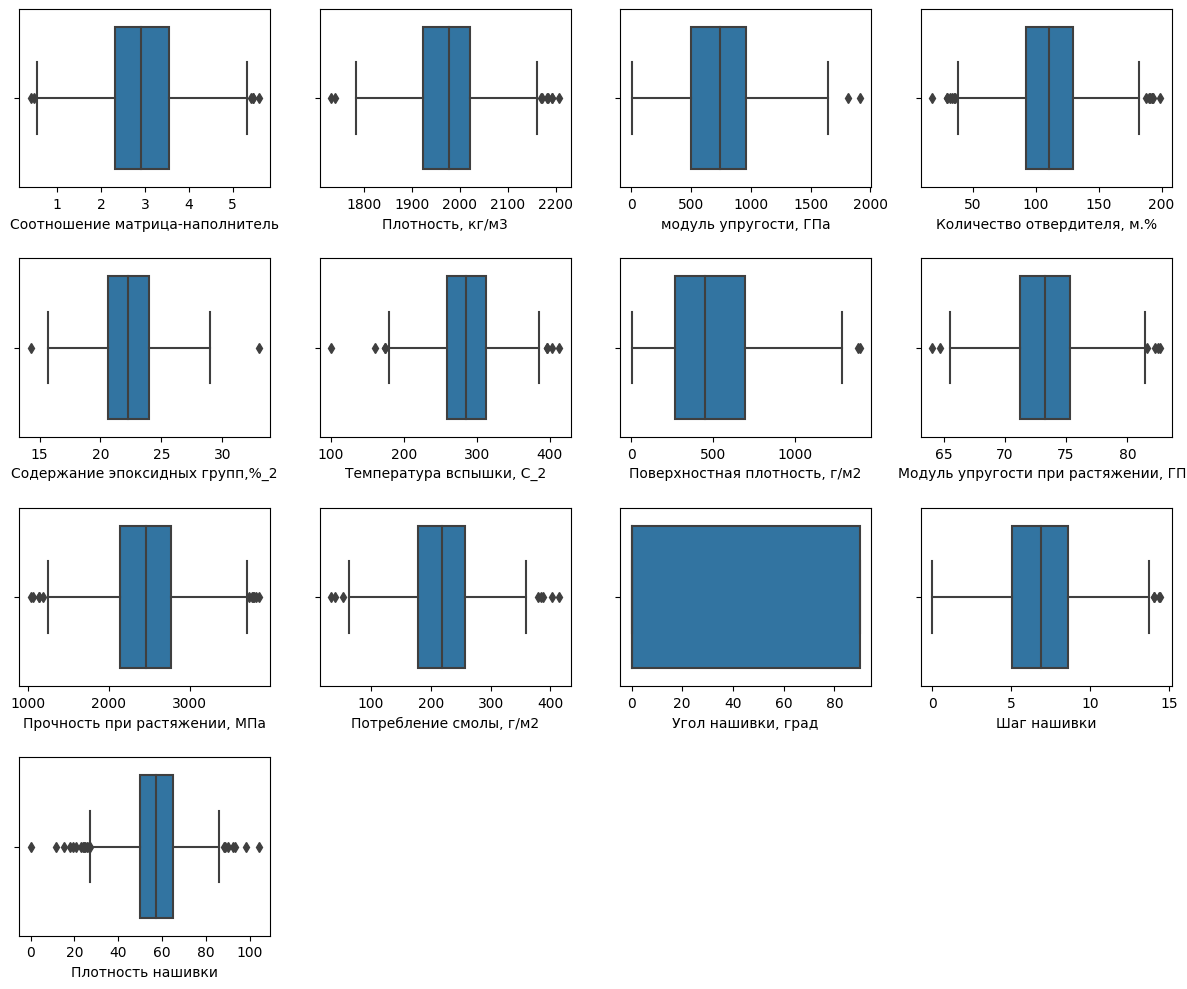

In [52]:
# Построим ящик с усами для каждой переменной.
fig=plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    ax=fig.add_subplot(4, 4, i+1) # создаём сетку 4x4
    sns.boxplot(data=df, x=col)
plt.tight_layout(h_pad=2, w_pad=2) # добавляем заголовок и отступы между графиками
plt.show()

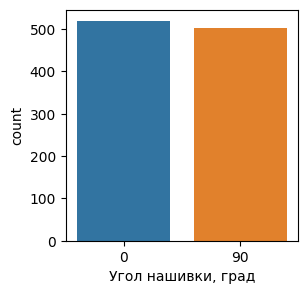

In [53]:
# Построим график Угол нашивки, град.
plt.figure(figsize=(3, 3)) # создать график и указать размер
sns.countplot(x=df['Угол нашивки, град']) # построить график
plt.show() # показать график

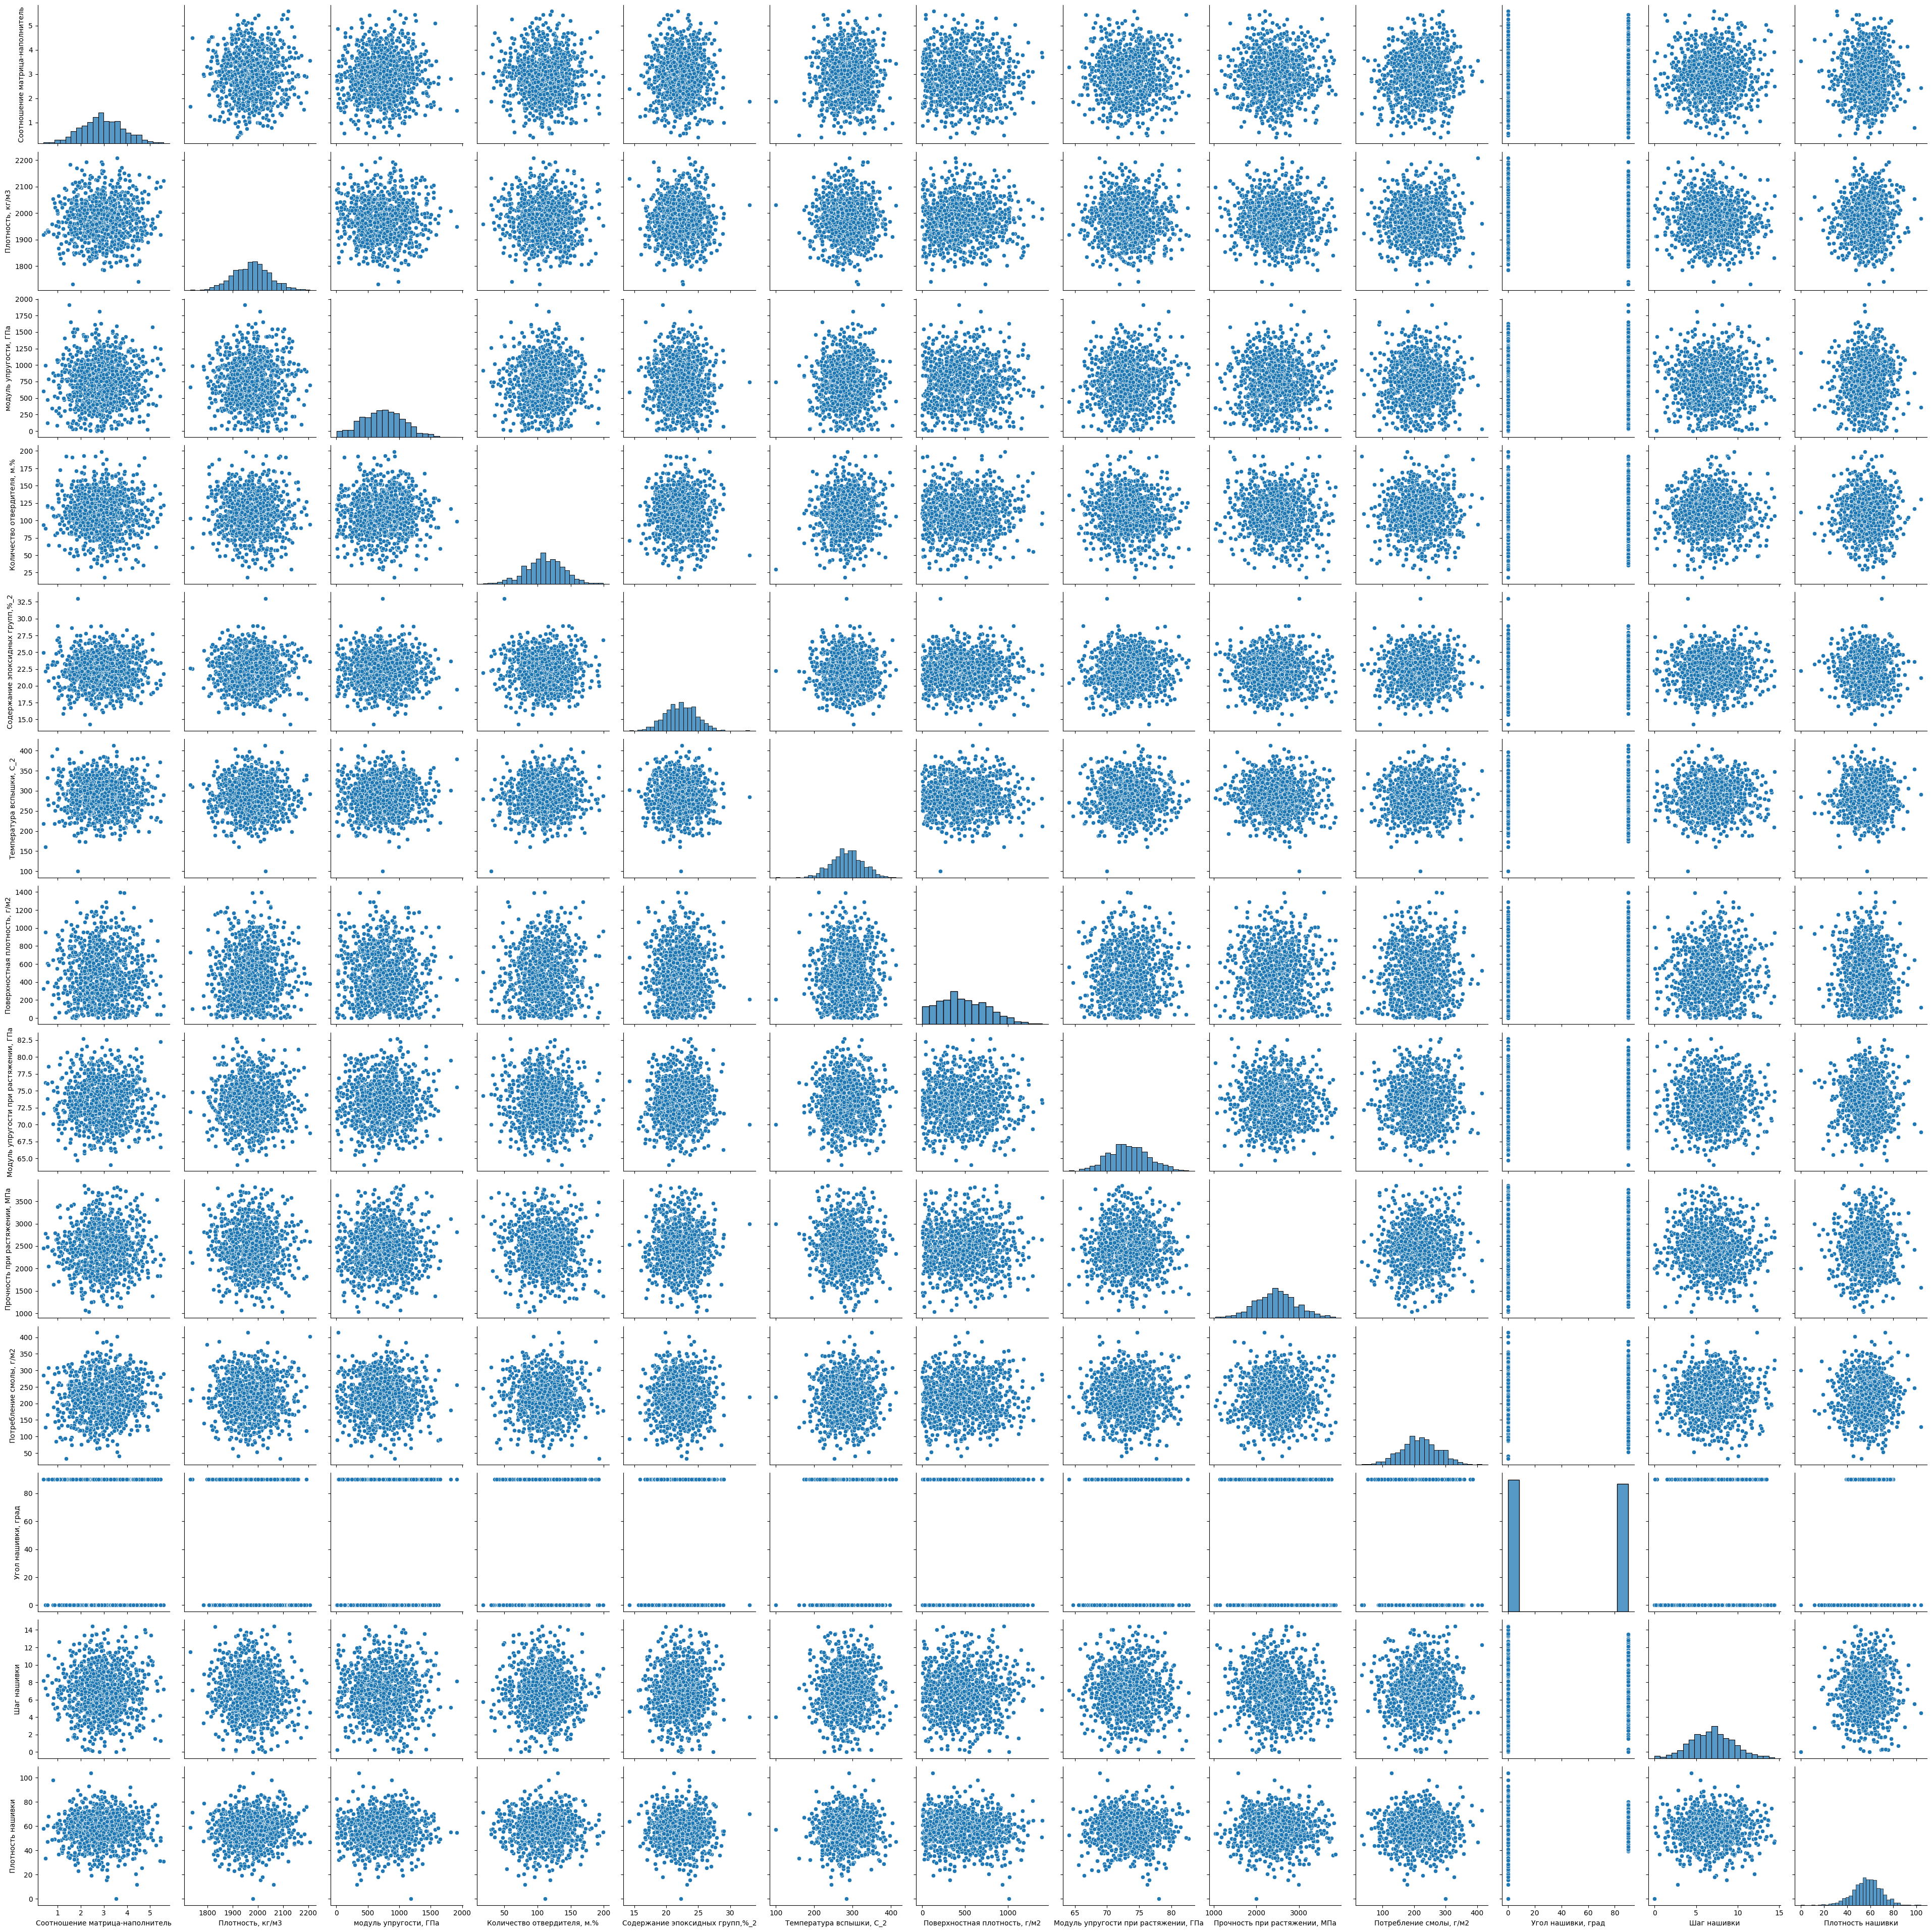

In [54]:
# Построим попарные графики рассеивания
sns.pairplot(df, height=3)

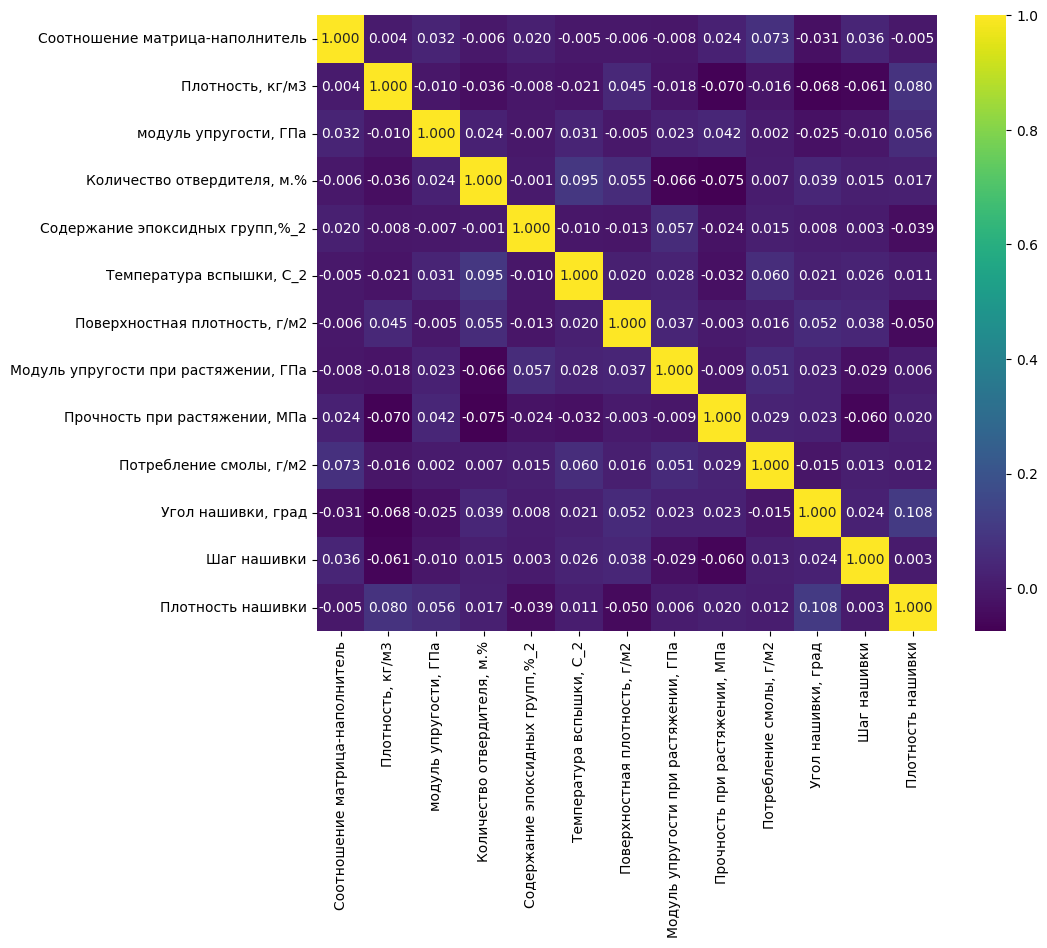

In [55]:
# Построим тепловую карту
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, fmt='.3f', cmap = 'viridis')
plt.show()

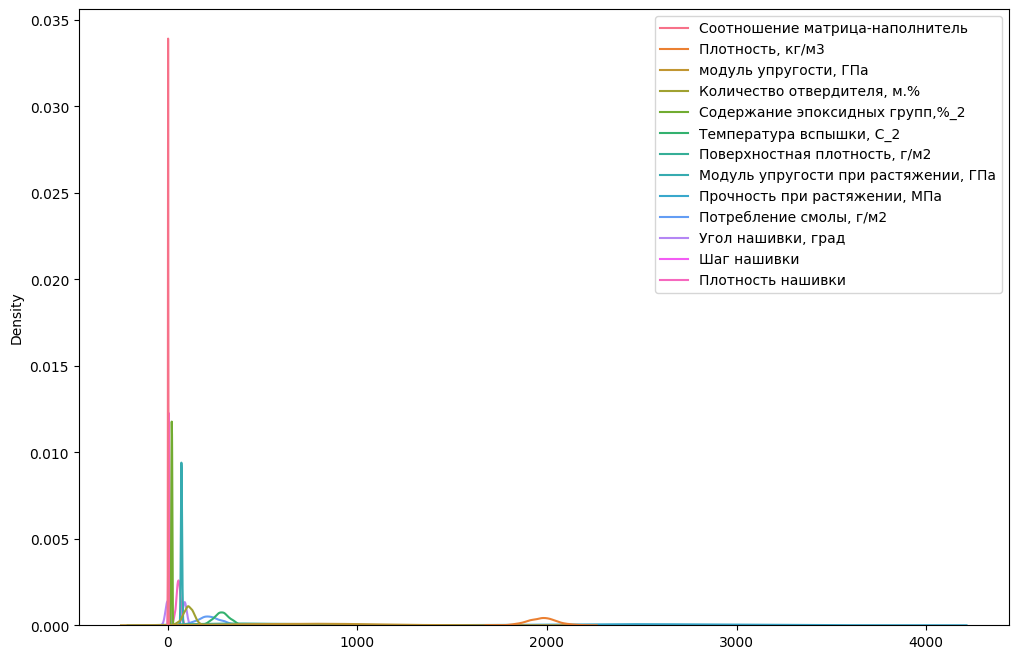

In [56]:
#Построим график оценки плотности
fig = plt.figure(figsize=(12, 8))
sns.kdeplot(data=df)
plt.show()

In [57]:
#Копируем датасет
df_с = df.copy()


In [58]:
# Удаляем выбросы в датасете с помощью метода трёх сигм
outliers = pd.DataFrame(index=df_с.index) # Создание пустого датафрейма для записи выбросов
for column in df_с: # запускаем цикл по каждому столбцу датафрема
    zscore = (df_с[column] - df_с[column].mean()) / df_с[column].std() # рассчитывание Z-оценки для каждого столбца
    outliers[column] = (zscore.abs() > 3) #определяем выбросы с помощью абсолютного значения Z-оценки > 3
df_c = df_с[outliers.sum(axis=1)==0] # фильтруем, оставляя только строки без выбросов
df_c.shape

(1000, 13)

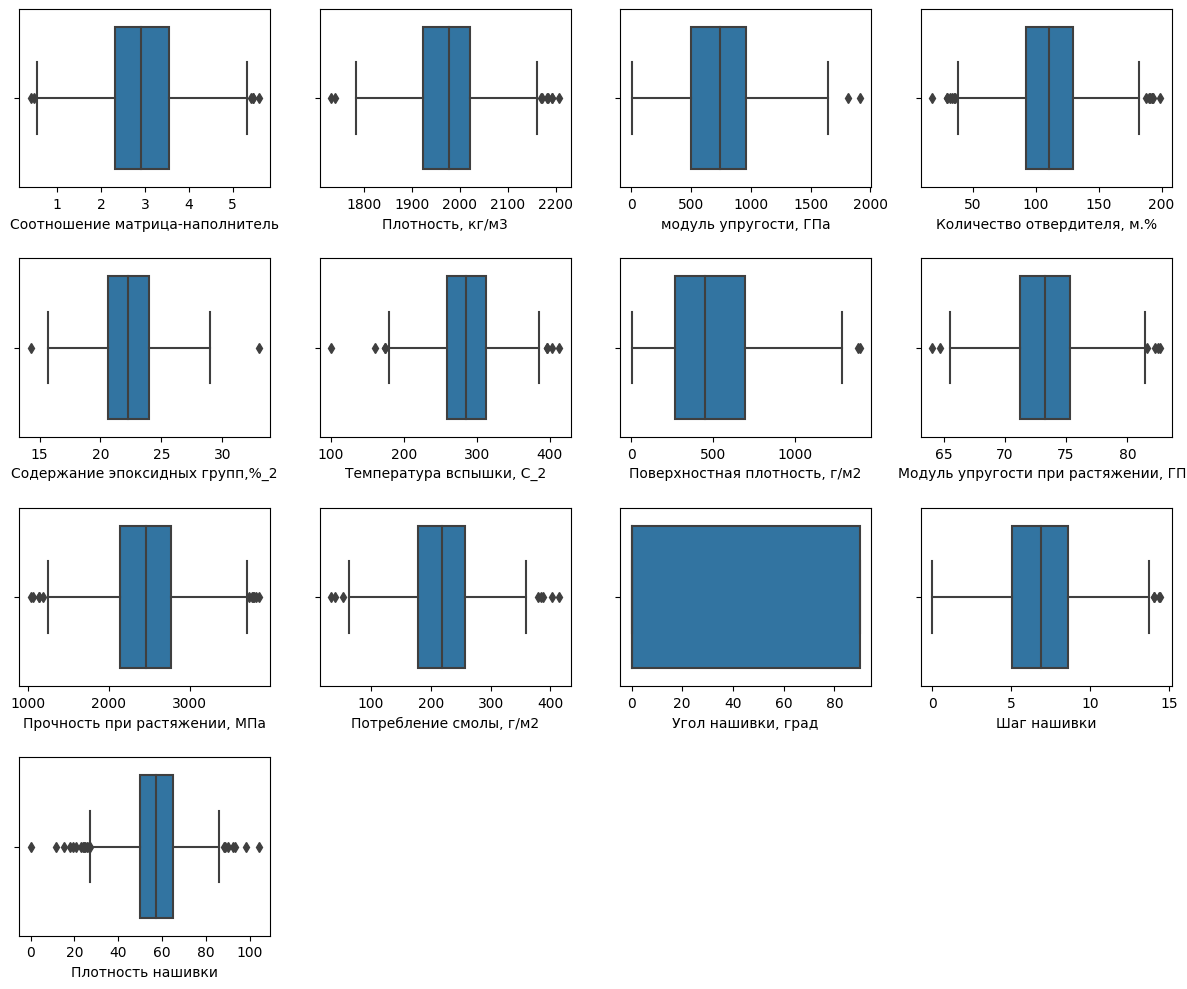

In [59]:
# Построим ящики с усами для каждой переменной после удаления выбрасов.
fig=plt.figure(figsize=(12, 10))
for i, col in enumerate(df_с.columns):
    ax=fig.add_subplot(4, 4, i+1) # создаём сетку 4x4
    sns.boxplot(data=df_с, x=col)
plt.tight_layout(h_pad=2, w_pad=2) # добавляем заголовок и отступы между графиками
plt.show()

In [60]:
# Сделаем несколько копий датасета очищенных от выбросов.
df_ = df_c.copy()
df_1 =df_c.copy()
df_2 =df_c.copy()
df_3 = df_c.copy()

Создание модели машинного обучения для предсказания - Модуля упругости при растяжении, ГПа.

In [61]:
# Разделим датасетдля предсказания - Модуля упругости при растяжении, ГПа.
X_tens = df_1.drop('Модуль упругости при растяжении, ГПа', axis=1)#tensile - tens
y_tens = df_1['Модуль упругости при растяжении, ГПа']

In [62]:
# Разделим датасет на тренировочную и тестовую выборки.
X_tens_train, X_tens_test, y_tens_train, y_tens_test = train_test_split(X_tens, y_tens, test_size=0.3, random_state=42)

In [63]:
# Проверим размероность созданных выборок.
print(X_tens_train.shape)
print(X_tens_test.shape)
print(y_tens_train.shape)
print(y_tens_test.shape)

(700, 12)
(300, 12)
(700,)
(300,)


In [64]:
# Сделаем нормализацию данных с помощью метода MinMaxScaler
scaler = MinMaxScaler()
X_ten_train_MM = pd.DataFrame(scaler.fit_transform(X_tens_train), columns = X_tens_train.columns)
X_ten_test_MM = pd.DataFrame(scaler.fit_transform(X_tens_test), columns = X_tens_test.columns)

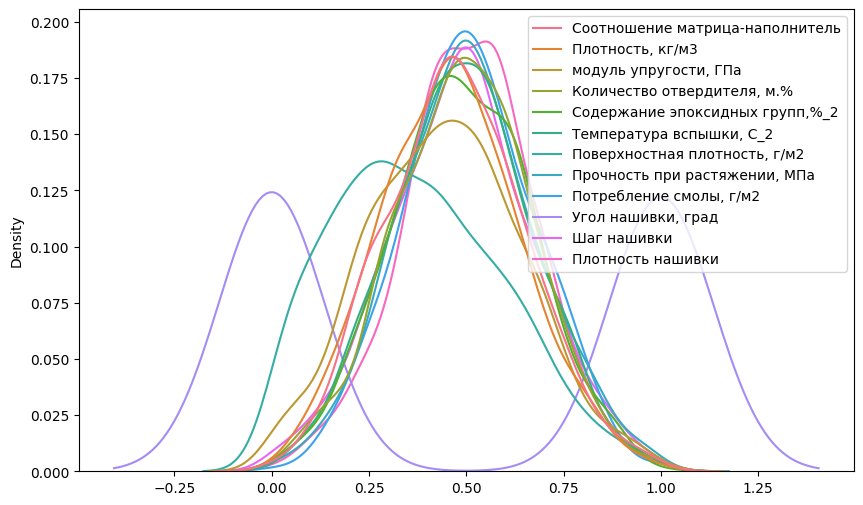

In [65]:
# График оценки плотности после нормализации.
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_ten_train_MM)
plt.show()

In [66]:
# Описательная статистика выборки train до нормализации данных
X_tens_train.describe().T

count    mean    std     min     25%     50%  \
Соотношение матрица-наполнитель 700.00    2.94   0.90    0.55    2.33    2.92   
Плотность, кг/м3                700.00 1972.29  73.15 1784.48 1919.83 1970.71   
модуль упругости, ГПа           700.00  738.63 326.13    2.44  498.03  738.85   
Количество отвердителя, м.%     700.00  112.12  28.06   33.62   92.84  112.15   
Содержание эпоксидных групп,%_2 700.00   22.18   2.34   15.70   20.60   22.15   
Температура вспышки, С_2        700.00  286.45  40.65  173.97  258.71  286.40   
Поверхностная плотность, г/м2   700.00  481.81 278.25    1.67  266.98  463.51   
Прочность при растяжении, МПа   700.00 2469.11 493.53 1071.12 2135.89 2455.97   
Потребление смолы, г/м2         700.00  216.84  58.11   41.05  177.04  216.54   
Угол нашивки, град              700.00   44.61  45.03    0.00    0.00    0.00   
Шаг нашивки                     700.00    6.88   2.59    0.04    5.14    6.91   
Плотность нашивки               700.00   57.40  12.04   20.57   49.64   57.30   

                                    75%     max  
Соотношение матрица-наполнитель    3.55    5.59  
Плотность, кг/м3                2020.19 2192.74  
модуль упругости, ГПа            955.96 1649.42  
Количество отвердителя, м.%      131.07  192.85  
Содержание эпоксидных групп,%_2   23.89   28.91  
Температура вспышки, С_2         313.70  403.65  
Поверхностная плотность, г/м2    687.18 1288.69  
Прочность при растяжении, МПа   2782.11 3848.44  
Потребление смолы, г/м2          255.41  386.90  
Угол нашивки, град                90.00   90.00  
Шаг нашивки                        8.59   14.03  
Плотность нашивки                 65.16   92.96

In [67]:
# Описательная статистика выборки train после нормализации данных
X_ten_train_MM.describe().T

count  mean  std  min  25%  50%  75%  max
Соотношение матрица-наполнитель 700.00  0.48 0.18 0.00 0.35 0.47 0.59 1.00
Плотность, кг/м3                700.00  0.46 0.18 0.00 0.33 0.46 0.58 1.00
модуль упругости, ГПа           700.00  0.45 0.20 0.00 0.30 0.45 0.58 1.00
Количество отвердителя, м.%     700.00  0.49 0.18 0.00 0.37 0.49 0.61 1.00
Содержание эпоксидных групп,%_2 700.00  0.49 0.18 0.00 0.37 0.49 0.62 1.00
Температура вспышки, С_2        700.00  0.49 0.18 0.00 0.37 0.49 0.61 1.00
Поверхностная плотность, г/м2   700.00  0.37 0.22 0.00 0.21 0.36 0.53 1.00
Прочность при растяжении, МПа   700.00  0.50 0.18 0.00 0.38 0.50 0.62 1.00
Потребление смолы, г/м2         700.00  0.51 0.17 0.00 0.39 0.51 0.62 1.00
Угол нашивки, град              700.00  0.50 0.50 0.00 0.00 0.00 1.00 1.00
Шаг нашивки                     700.00  0.49 0.19 0.00 0.36 0.49 0.61 1.00
Плотность нашивки               700.00  0.51 0.17 0.00 0.40 0.51 0.62 1.00

In [68]:
#Копируем датафрейм до выбросов, чтоюы посмотреть различные модели машинного обучения до удаления выбросов
df_0 = df.copy()
df_0.shape


(1023, 13)

In [69]:
# Разделим датасетдля предсказания - Модуля упругости при растяжении, ГПа.
X_tens_0 = df_0.drop('Модуль упругости при растяжении, ГПа', axis=1)#tensile - tens
y_tens_0 = df_0['Модуль упругости при растяжении, ГПа']
# Разделим датасет на тренировочную и тестовую выборки.
X_tens_0_train, X_tens_0_test, y_tens_0_train, y_tens_0_test = train_test_split(X_tens_0, y_tens_0, test_size=0.3, random_state=42)

In [70]:
# Проверим размероность созданных выборок.
print(X_tens_0_train.shape)
print(X_tens_0_test.shape)
print(y_tens_0_train.shape)
print(y_tens_0_test.shape)

(716, 12)
(307, 12)
(716,)
(307,)


In [71]:
#Рассмотрим различные модели машинного обучения на датасете до удаления выбросов
reg_0 = LazyRegressor(verbose=0,
                    ignore_warnings=False,
                    custom_metric=None)
models_0, predictions_0 = reg_0.fit(X_tens_0_train, X_tens_0_test, y_tens_0_train, y_tens_0_test)
models_0
models_0.style.highlight_max(axis=0)# Подсвечиваем лучщие значения

100%|██████████| 42/42 [00:15<00:00,  2.64it/s]


In [72]:
##Рассмотрим различные модели машинного обучения на датасете после удаления выбросов
reg = LazyRegressor(verbose=0,
                    ignore_warnings=False,
                    custom_metric=None)
models, predictions = reg.fit(X_tens_train, X_tens_test, y_tens_train, y_tens_test)
models
models.style.highlight_max(axis=0)# Подсвечиваем лучщие значения

100%|██████████| 42/42 [00:14<00:00,  2.87it/s]


In [73]:
# Выберим список моделей для подбора парметров.
models_par_tens = [DecisionTreeRegressor(), DummyRegressor(), ElasticNet(), GradientBoostingRegressor(), LassoLars(), Lasso(), LinearRegression(), 
         RandomForestRegressor(), Ridge(), KernelRidge()]


In [74]:
# Определим параметры для подбора.
params = {'DecisionTreeRegressor': {'max_depth': np.arange(1, 10), 
                                    'min_samples_leaf':[1, 2, 4, 6],
                                    'min_samples_split':[2, 4, 6],},
          'DummyRegressor': {'strategy': ['mean', 'median', 'quantile', 'constant'],
                             'quantile': [0.05, 0.5, 0.95]},
          'ElasticNet': {'alpha': np.linspace(0.01, 2, 20),
                         'max_iter': [100, 500, 1000]},
          'GradientBoostingRegressor': {'learning_rate': np.linspace(0.01, 1, 10), 
                                       'n_estimators': np.arange(50, 500, 50), 
                                       'min_samples_split': [2, 4, 6],
                                       'max_depth': [2, 4, 6], 
                                       'learning_rate': [0.1, 0.2, 0.3]},
          'LassoLars': {'alpha': np.linspace(0.01, 2, 20),
                        'max_iter': [100, 500, 1000]},        
          'Lasso': {'alpha': np.linspace(0.01, 2, 20), 
                    'max_iter':[1000, 10000, 100000],
                    'tol': [0.0001, 0.001, 0.01]}, 
          'LinearRegression': {'fit_intercept':[True,False]}, 
          'RandomForestRegressor': {'max_depth': np.arange(1, 10), 
                                    'n_estimators': np.arange(50, 500, 50),
                                    'min_samples_split' : [2, 5, 10],},
          'Ridge': {'alpha': np.linspace(0.01, 2, 20), 
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'max_iter': [100, 500, 1000]},
          'KernelRidge': {'alpha': np.linspace(0.01, 2, 20), 
                          'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                          'gamma': [1e-3, 1e-2, 1e-1, 1, 10, 100],
                          'degree': [1, 2, 3, 4, 5]}}

In [75]:
# Запустим поиск оптимальных гиперпараметров для каждой из моделей через GreadsearchSV.
for model in models_par_tens:
    grid_search = GridSearchCV(model, params[model.__class__.__name__], cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_ten_train_MM,  y_tens_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(model.__class__.__name__)
    print(f'Best params: {best_params}')
    print(f'Best score: {best_score}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
DecisionTreeRegressor
Best params: {'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best score: 0.0019392875864082005
Fitting 5 folds for each of 12 candidates, totalling 60 fits
DummyRegressor
Best params: {'quantile': 0.05, 'strategy': 'median'}
Best score: -0.0034053327812541222
Fitting 5 folds for each of 60 candidates, totalling 300 fits
ElasticNet
Best params: {'alpha': 0.01, 'max_iter': 100}
Best score: 0.004915520177238508
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
GradientBoostingRegressor
Best params: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best score: -0.0050463632412840465
Fitting 5 folds for each of 60 candidates, totalling 300 fits
LassoLars
Best params: {'alpha': 0.01, 'max_iter': 100}
Best score: 0.002300108919754873
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Lasso
Best params: {'alpha': 0.01, 'max_iter': 1000,

In [79]:
# Напишем функцию для расчёта коэффициента детерминации, среднеквадратичной и средней абсолютной ошибки.
def func_metrics(models, x, y):
    stat = pd.DataFrame() # создаём датафрейм для хранения результатов оценки моделей.
    cv = KFold(10, shuffle=True, random_state=42) # создаём объект KFold, который будет использоваться для кросс-валидации.
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'] # создаём список метрик для оценки моделей. 
    for model_name, model in models.items(): # запускает цикл по каждой модели в словаре models.
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring) #запускаем кросс-валидацию.
        # сохраняем среднии значения метрик.
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
    return stat

In [80]:
# Сравнение моделей с подобранными параметрами на тренировочной выборке методом GridSearchCV.
models1_2 = {
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=1, min_samples_leaf=1, min_samples_split=6),
    'DummyRegressor': DummyRegressor(quantile=0.05, strategy='mean'),
    'ElasticNet': ElasticNet(alpha=0.01, max_iter=100),
    'GradientBoostingRegressor': GradientBoostingRegressor (learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=50),
    'LassoLars': LassoLars(alpha=0.01, max_iter=100),
    'Lasso': Lasso(alpha=0.01, max_iter=1000, tol=0.01),
    'LinearRegression': LinearRegression(fit_intercept = True),
    'RandomForestRegressor': RandomForestRegressor(max_depth = 4, n_estimators = 200, min_samples_split = 10, random_state=42),
    'Ridge': Ridge(alpha=2, max_iter=500, solver='sag'),
    'KernelRidge': KernelRidge(alpha=0.01, degree=4, gamma=0.01, kernel='poly')    
}
stat1_2 = func_metrics(models1_2, X_ten_train_MM, y_tens_train)
stat1_2.style.highlight_max(axis=0)  # Подсвечиваем лучщие значения.

Подбор гиперпараметров не сильно улучшил результаты, все модели по прежнему показывают плохие результаты. Наилучший результат с подобранными гиперпараметрами показала модель ElasticNet

In [81]:
#Обучим и предскажем значения для каждой из моделей.

#DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(max_depth=1, min_samples_leaf=1, min_samples_split=6)
dtr_model.fit(X_ten_train_MM, y_tens_train)
y_pred_dtr = dtr_model.predict(X_ten_test_MM)

#DummyRegressor
dr_model = DummyRegressor(quantile=0.05, strategy='mean')
dr_model.fit(X_ten_train_MM, y_tens_train)
y_pred_dr = dr_model.predict(X_ten_test_MM)

#ElasticNet
en_model = ElasticNet(alpha=0.01, max_iter=100)
en_model.fit(X_ten_train_MM, y_tens_train)
y_pred_en = en_model.predict(X_ten_test_MM)

#GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=50)
gbr_model.fit(X_ten_train_MM, y_tens_train)
y_pred_gbr = gbr_model.predict(X_ten_test_MM)

#LassoLars
ll_model = LassoLars(alpha=0.01, max_iter=100)
ll_model.fit(X_ten_train_MM, y_tens_train)
y_pred_ll = ll_model.predict(X_ten_test_MM)

#Lasso
l_model = Lasso(alpha=0.01, max_iter=1000, tol=0.01)
l_model.fit(X_ten_train_MM, y_tens_train)
y_pred_l = l_model.predict(X_ten_test_MM)

# LinearRegression
lr_model = LinearRegression(fit_intercept = True)
lr_model.fit(X_ten_train_MM, y_tens_train)
y_pred_lr = lr_model.predict(X_ten_test_MM)

# RandomForestRegressor
rf_model = RandomForestRegressor(max_depth = 4, n_estimators = 200, min_samples_split = 10, random_state=42)
rf_model.fit(X_ten_train_MM, y_tens_train)
y_pred_rf = rf_model.predict(X_ten_test_MM)

#Ridge
r_model = Ridge(alpha=2, max_iter=500, solver='sag')
r_model.fit(X_ten_train_MM, y_tens_train)
y_pred_r = r_model.predict(X_ten_test_MM)

# KernelRidge
kr_model = KernelRidge(alpha=0.01, degree=4, gamma=0.01, kernel='poly')
kr_model.fit(X_ten_train_MM, y_tens_train)
y_pred_kr = kr_model.predict(X_ten_test_MM)

# Посчитаем среднеквадратичную ошибку для каждой модели
rmse_dtr = np.sqrt(mean_squared_error(y_tens_test, y_pred_dtr))
rmse_dr = np.sqrt(mean_squared_error(y_tens_test, y_pred_dr))
rmse_en = np.sqrt(mean_squared_error(y_tens_test, y_pred_en))
rmse_gbr = np.sqrt(mean_squared_error(y_tens_test, y_pred_gbr))
rmse_ll = np.sqrt(mean_squared_error(y_tens_test, y_pred_ll))
rmse_l = np.sqrt(mean_squared_error(y_tens_test, y_pred_l))
rmse_lr = np.sqrt(mean_squared_error(y_tens_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_tens_test, y_pred_rf))
rmse_r = np.sqrt(mean_squared_error(y_tens_test, y_pred_r))
rmse_kr = np.sqrt(mean_squared_error(y_tens_test, y_pred_kr))

# Рассчитаем среднюю абсолютную ошибку.
mae_dtr = mean_absolute_error(y_tens_test, y_pred_dtr)
mae_dr = mean_absolute_error(y_tens_test, y_pred_dr)
mae_en = mean_absolute_error(y_tens_test, y_pred_en)
mae_gbr = mean_absolute_error(y_tens_test, y_pred_gbr)
mae_ll = mean_absolute_error(y_tens_test, y_pred_ll)
mae_l = mean_absolute_error(y_tens_test, y_pred_l)
mae_lr = mean_absolute_error(y_tens_test, y_pred_lr)
mae_rf = mean_absolute_error(y_tens_test, y_pred_rf)
mae_r = mean_absolute_error(y_tens_test, y_pred_r)
mae_kr = mean_absolute_error(y_tens_test, y_pred_kr)

# Рассчитаем коэффициент детерминации(r2-score).
r2_dtr= r2_score(y_tens_test, y_pred_dtr)
r2_dr= r2_score(y_tens_test, y_pred_dr)
r2_en = r2_score(y_tens_test, y_pred_en)
r2_gbr= r2_score(y_tens_test, y_pred_gbr)
r2_ll = r2_score(y_tens_test, y_pred_ll)
r2_l = r2_score(y_tens_test, y_pred_l)
r2_lr = r2_score(y_tens_test, y_pred_lr)
r2_rf = r2_score(y_tens_test, y_pred_rf)
r2_r= r2_score(y_tens_test, y_pred_r)
r2_kr = r2_score(y_tens_test, y_pred_kr)

In [82]:
# Создаём таблицу для сравнения предсказаний для модуля упругости при растяжении на тестовых данных .

# Создаём список с названием строк
idx = ['DecisionTreeRegressor', 'DummyRegressor', 'ElasticNet', 'GradientBoostingRegressor', 'LassoLars', 'Lasso', 'LinearRegression', 'RandomForestRegressor', 'Ridge', 'KernelRidge']
  
# Создаём список с названием столбцов
cols = ['R2', 'RMSE', 'MAE']

# Добавляем значение в строки и столбцы  и преобразуем в датафрейм
df_table = pd.DataFrame([[r2_dtr, rmse_dtr, mae_dtr],
                         [r2_dr, rmse_dr, mae_dr],
                         [r2_en, rmse_en, mae_en],
                         [r2_gbr, rmse_gbr, mae_gbr],
                         [r2_ll, rmse_ll, mae_ll],
                         [r2_l, rmse_l, mae_l],
                         [r2_lr, rmse_lr, mae_lr], 
                         [r2_rf, rmse_rf, mae_rf],
                         [r2_r, rmse_r, mae_r], 
                         [r2_kr, rmse_kr, mae_kr]],
                         columns = cols, index = idx)
  
# Отображаем датафрейм в виде тепловой карты
df_table.style.background_gradient(cmap ='Greens')\
        .set_properties(**{'font-size': '14px'})

Все модели показали неудовлетворительные результаты, коэффициент детерминации у лучших моделей находится около нуля. Лучшие показатели на тестовой выборке показывает модель DummyRegressor.

**Модель для расчёта прочности при растяжении**

In [76]:
# Разделим датасет на признаки для предсказания - Прочности при растяжении, МПа.
X_str = df_2.drop('Прочность при растяжении, МПа', axis=1)# str - strength
y_str = df_2['Прочность при растяжении, МПа']

In [77]:
# Разделим датасет на тестовую и проверочную выборку.
X_str_train, X_str_test, y_str_train, y_str_test = train_test_split(X_str, y_str, test_size=0.3, random_state=42)

In [78]:
# Проверим размероность созданных выборок.
print(X_str_train.shape)
print(X_str_test.shape)
print(y_str_train.shape)
print(y_str_test.shape)

(700, 12)
(300, 12)
(700,)
(300,)


In [83]:
# Сделаем нормализацию данных с помощью метода MinMaxScaler
scaler = MinMaxScaler()
X_str_train_MM = pd.DataFrame(scaler.fit_transform(X_str_train), columns = X_str_train.columns)
X_str_test_MM = pd.DataFrame(scaler.fit_transform(X_str_test), columns = X_str_test.columns)

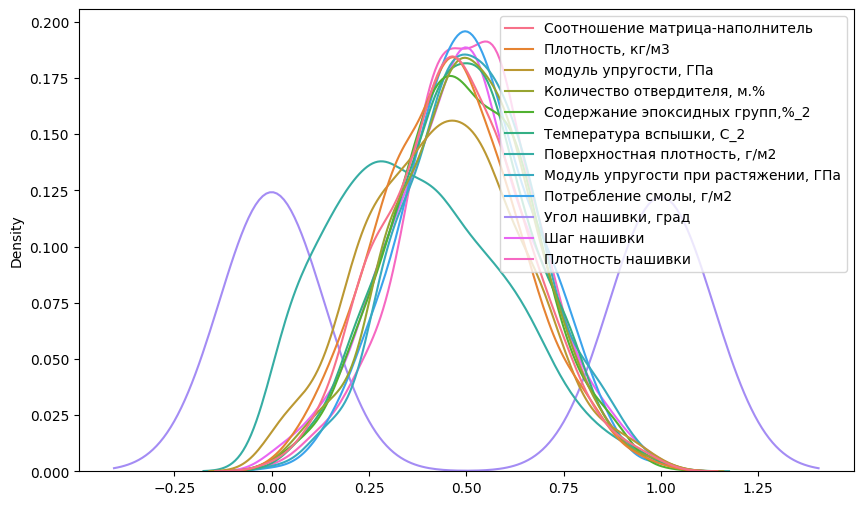

In [84]:
# График оценки плотности после нормализации.
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_str_train_MM)
plt.show()

In [85]:
##Рассмотрим различные модели машинного обучения на датасете после удаления выбросов
reg_1 = LazyRegressor(verbose=0,
                    ignore_warnings=False,
                    custom_metric=None)
models_str, predictions_str = reg.fit(X_str_train, X_str_test, y_str_train, y_str_test)
models_str
models_str.style.highlight_max(axis=0)# Подсвечиваем лучшие значения

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:15<00:00,  2.64it/s]


In [ ]:
# Выберим список моделей для подбора парметров.
models_par_str = [BayesianRidge(), DecisionTreeRegressor(), DummyRegressor(), ElasticNetCV(), GradientBoostingRegressor(), Lasso(), LinearRegression(), 
                  KernelRidge(), RandomForestRegressor(), SVR()]

In [ ]:
# Определим параметры для подбора
params = {'BayesianRidge': {'alpha_1': np.linspace(0.01, 2, 20), 
                            'alpha_2': np.linspace(0.01, 2, 20), 
                            'lambda_1':[0.01, 0.1, 1], 
                            'lambda_2':[0.01, 0.1, 1]},
          'DecisionTreeRegressor': {'max_depth': np.arange(1, 10), 
                                    'min_samples_leaf':[1, 2, 4, 6],
                                    'min_samples_split':[2,4,6],}, 
          'DummyRegressor': {'strategy': ['mean', 'median', 'quantile', 'constant'],
                             'quantile': [0.05, 0.5, 0.95]},
          'ElasticNetCV': {'l1_ratio': np.arange(0.01, 1, 0.1)}, 
          'GradientBoostingRegressor':  {'learning_rate': np.linspace(0.01, 1, 10), 
                                       'n_estimators': np.arange(50, 500, 25), 
                                       'min_samples_split': [2, 4, 6],
                                       'max_depth': [2, 4, 6], 
                                       'learning_rate': [0.1, 0.2, 0.3]},
          'Lasso': {'alpha': np.linspace(0.01, 2, 20), 
                    'max_iter':[1000, 10000, 100000],
                    'tol': [0.0001, 0.001, 0.01]},
          'LinearRegression': {'fit_intercept':[True,False]},
          'KernelRidge': {'alpha': np.linspace(0.01, 2, 20), 
                          'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                          'gamma': [1e-3, 1e-2, 1e-1, 1, 10, 100],
                          'degree': [1, 2, 3, 4, 5]},
          'RandomForestRegressor': {'max_depth': np.arange(1, 10), 
                                    'n_estimators': np.arange(50, 500, 25),
                                    'min_samples_split' : [2, 5, 10],},
          'SVR': {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                  'C': np.linspace(0.1, 10, 10),
                  'epsilon': [0.01, 0.1, 1, 10, 100],
                  'gamma': np.linspace(0.1, 1, 10)}}


In [ ]:
# Запустим поиск оптимальных гиперпараметров через GreadsearchSV
for model in models_par_str:
    grid_search = GridSearchCV(model, params[model.__class__.__name__], cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_str_train_MM, y_str_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(model.__class__.__name__)
    print(f'Best params: {best_params}')
    print(f'Best score: {best_score}')

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
BayesianRidge
Best params: {'alpha_1': 0.01, 'alpha_2': 2.0, 'lambda_1': 1, 'lambda_2': 0.01}
Best score: -0.008562414395703977
Fitting 5 folds for each of 108 candidates, totalling 540 fits
DecisionTreeRegressor
Best params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best score: -0.032277990804581956
Fitting 5 folds for each of 12 candidates, totalling 60 fits
DummyRegressor
Best params: {'quantile': 0.05, 'strategy': 'median'}
Best score: -0.008404994832339963
Fitting 5 folds for each of 10 candidates, totalling 50 fits
ElasticNetCV
Best params: {'l1_ratio': 0.01}
Best score: -0.008738403076475132
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
GradientBoostingRegressor
Best params: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 50}
Best score: -0.006031899601429025
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Lasso
Best params: {'al

In [ ]:
# Сравнение моделей с подобранными параметрами на тренировочной выборке методом GridSearchCV.
models2_2 = {
    'BayesianRidge': BayesianRidge(alpha_1 = 0.01, alpha_2 = 2.0, lambda_1 = 1, lambda_2 = 0.01),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=1, min_samples_leaf=1, min_samples_split=2 ),
    'DummyRegressor': DummyRegressor(quantile=0.05, strategy='median'),
    'ElasticNetCV': ElasticNetCV(l1_ratio = 0.01),
    'GradientBoostingRegressor': GradientBoostingRegressor(learning_rate=0.1, max_depth=2, min_samples_split=6, n_estimators=50),
    'Lasso': Lasso(alpha = 2.0, max_iter = 1000, tol = 0.01),
    'LinearRegression': LinearRegression(fit_intercept = True),
    'KernelRidge': KernelRidge(alpha = 0.43, degree = 1, gamma = 0.01, kernel = 'rbf'),
    'RandomForestRegressor': RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=150),
    'SVR': SVR(C = 8.9, epsilon = 0.01, gamma = 0.8, kernel = 'poly')
}
stat2_2 = func_metrics(models2_2, X_str_train_MM, y_str_train)
stat2_2.style.highlight_max(axis=0) # Подсвечиваем лучшие значения.

In [ ]:
# Обучим и предскажем значения для каждой из моделей.

#BayesianRidge
br_model2 = BayesianRidge(alpha_1 = 0.01, alpha_2 = 2.0, lambda_1 = 1, lambda_2 = 0.01)
br_model2.fit(X_str_train_MM, y_str_train)
y_pred_br2 = br_model2.predict(X_str_test_MM)

#DecisionTreeRegressor
dtr_model2 = DecisionTreeRegressor(max_depth=1, min_samples_leaf=1, min_samples_split=2)
dtr_model2.fit(X_str_train_MM, y_str_train)
y_pred_dtr2 = dtr_model2.predict(X_str_test_MM)

# DummyRegressor
dr_model2 = DummyRegressor(quantile=0.05, strategy='median')
dr_model2.fit(X_str_train_MM, y_str_train)
y_pred_dr2 = dr_model2.predict(X_str_test_MM)

# ElasticNetCV
en_model2 = ElasticNetCV(l1_ratio = 0.01)
en_model2.fit(X_str_train_MM, y_str_train)
y_pred_en2 = en_model2.predict(X_str_test_MM)

#GradientBoostingRegressor
gbr_model2 = GradientBoostingRegressor(learning_rate=0.1, max_depth=2, min_samples_split=6, n_estimators=50)
gbr_model2.fit(X_str_train_MM, y_str_train)
y_pred_gbr2 = gbr_model2.predict(X_str_test_MM)

# Lasso
l_model2 = Lasso(alpha = 2.0, max_iter = 1000, tol = 0.01)
l_model2.fit(X_str_train_MM, y_str_train)
y_pred_l2 = l_model2.predict(X_str_test_MM)

# LinearRegression
lr_model2 = LinearRegression(fit_intercept = True)
lr_model2.fit(X_str_train_MM, y_str_train)
y_pred_lr2 = lr_model2.predict(X_str_test_MM)

# KernelRidge
kr_model2 = KernelRidge(alpha = 0.43, degree = 1, gamma = 0.01, kernel = 'rbf')
kr_model2.fit(X_str_train_MM, y_str_train)
y_pred_kr2 = kr_model2.predict(X_str_test_MM)

#RandomForestRegressor
rfr_model2 = RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=150)
rfr_model2.fit(X_str_train_MM, y_str_train)
y_pred_rfr2 = rfr_model2.predict(X_str_test_MM)

# SVR
svr_model2 = SVR(C = 8.9, epsilon = 0.01, gamma = 0.8, kernel = 'poly')
svr_model2.fit(X_str_train_MM, y_str_train)
y_pred_svr2 = svr_model2.predict(X_str_test_MM)

# Посчитаем среднеквадратичную ошибку для каждой модели
rmse_br2 = np.sqrt(mean_squared_error(y_str_test, y_pred_br2))
rmse_dtr2 = np.sqrt(mean_squared_error(y_str_test, y_pred_dtr2))
rmse_dr2 = np.sqrt(mean_squared_error(y_str_test, y_pred_dr2))
rmse_en2 = np.sqrt(mean_squared_error(y_str_test, y_pred_en2))
rmse_gbr2 = np.sqrt(mean_squared_error(y_str_test, y_pred_gbr2))
rmse_l2 = np.sqrt(mean_squared_error(y_str_test, y_pred_l2))
rmse_lr2 = np.sqrt(mean_squared_error(y_str_test, y_pred_lr2))
rmse_kr2 = np.sqrt(mean_squared_error(y_str_test, y_pred_kr2))
rmse_rfr2 = np.sqrt(mean_squared_error(y_str_test, y_pred_rfr2))
rmse_svr2 = np.sqrt(mean_squared_error(y_str_test, y_pred_svr2))


# Рассчитаем среднюю абсолютную ошибку.
mae_br2 = mean_absolute_error(y_str_test, y_pred_br2)
mae_dtr2 = mean_absolute_error(y_str_test, y_pred_dtr2)
mae_dr2 = mean_absolute_error(y_str_test, y_pred_dr2)
mae_en2 = mean_absolute_error(y_str_test, y_pred_en2)
mae_gbr2 = mean_absolute_error(y_str_test, y_pred_gbr2)
mae_l2 = mean_absolute_error(y_str_test, y_pred_l2)
mae_lr2 = mean_absolute_error(y_str_test, y_pred_lr2)
mae_kr2 = mean_absolute_error(y_str_test, y_pred_kr2)
mae_rfr2 = mean_absolute_error(y_str_test, y_pred_rfr2)
mae_svr2 = mean_absolute_error(y_str_test, y_pred_svr2)


# Рассчитаем коэффициент детерминации(r2-score).
r2_br2 = r2_score(y_str_test, y_pred_br2)
r2_dtr2 = r2_score(y_str_test, y_pred_dtr2)
r2_dr2 = r2_score(y_str_test, y_pred_dr2)
r2_en2 = r2_score(y_str_test, y_pred_en2)
r2_gbr2 = r2_score(y_str_test, y_pred_gbr2)
r2_l2 = r2_score(y_str_test, y_pred_l2)
r2_lr2 = r2_score(y_str_test, y_pred_lr2)
r2_kr2 = r2_score(y_str_test, y_pred_kr2)
r2_rfr2 = r2_score(y_str_test, y_pred_rfr2)
r2_svr2 = r2_score(y_str_test, y_pred_svr2)

In [ ]:
# Создаём таблицу для сравнения предсказаний модели для расчёта прочности при растяжении на тестовых данных.

# Создаём список с названием строк
idx = ['BayesianRidge', 'DecisionTreeRegressor', 'DummyRegressor', 'ElasticNetCV', 'GradientBoostingRegressor','Lasso',
       'LinearRegression', 'KernelRidge', 'RandomForestRegressor', 'SVR']
  
# Создаём список с названием столбцов
cols = ['R2', 'RMSE', 'MAE']

# Добавляем значение в строки и столбцы и преобразуем в датафрейм
df_table2 = pd.DataFrame([[r2_br2, rmse_br2, mae_br2],
                          [r2_dtr2, rmse_dtr2, mae_dtr2],  
                          [r2_dr2, rmse_dr2, mae_dr2],  
                          [r2_en2, rmse_en2, mae_en2], 
                          [r2_gbr2, rmse_gbr2, mae_gbr2],
                          [r2_l2, rmse_l2, mae_l2],
                          [r2_lr2, rmse_lr2, mae_lr2],  
                          [r2_kr2, rmse_kr2, mae_kr2],
                          [r2_rfr2, rmse_rfr2, mae_rfr2],  
                          [r2_svr2, rmse_svr2, mae_svr2]],
                          columns = cols, index = idx)
  
# Отображаем датафрейм в виде тепловой карты
df_table2.style.background_gradient(cmap ='Greens').set_properties(**{'font-size': '14px'})

Все модели показали неудовлетворительные результаты, коэффициент детерминации у лучших моделей находится около нуля. Лучшие показатели на тестовой выборке показывает модель DummyRegressor, BayesianRidge  и ElasticNetCV.

**Создание нейронной сети для прогнозирования соотношения матрица-наполнитель.**

In [99]:
# Разделим датасет на признаки для предсказания - Соотношение матрица-наполнитель.
X_matrix = df_3.drop('Соотношение матрица-наполнитель', axis=1)
y_matrix = df_3['Соотношение матрица-наполнитель']

In [ ]:
# Разделим датасет на тестовую и проверочную выборку.
X_matrix_train, X_matrix_test, y_matrix_train, y_matrix_test = train_test_split(X_matrix, y_matrix, test_size=0.3, random_state=42)

In [ ]:
# Проверим размероность созданных выборок.
print(X_matrix_train.shape)
print(X_matrix_test.shape)
print(y_matrix_train.shape)
print(y_matrix_test.shape)

(700, 12)
(300, 12)
(700,)
(300,)


In [ ]:
# Сделаем нормализацию данных с помощью метода MinMaxScaler
scaler = MinMaxScaler()
X_matrix_train_MM = pd.DataFrame(scaler.fit_transform(X_matrix_train), columns = X_matrix_train.columns)
X_matrix_test_MM = pd.DataFrame(scaler.fit_transform(X_matrix_test), columns = X_matrix_test.columns)

In [ ]:
# Модель предсказывающая среднее значение
base_model3 = DummyRegressor(strategy='mean')

# Предсказание модели предсказывающей среднее значение
base_model3.fit(X_matrix_train_MM, y_matrix_train)
y_matrix_pred_mean = base_model3.predict(X_matrix_test_MM)

In [ ]:
# Создаём нейронную сеть MLPRegressor из библиотеки sklearn.
model3_1 = MLPRegressor(
    hidden_layer_sizes = (12, 12),
    max_iter=500,
    random_state=42)


In [ ]:

%%time
# Запускаем нейросеть
model3_1.fit(X_matrix_train_MM.values, y_matrix_train)

CPU times: user 498 ms, sys: 3.83 ms, total: 502 ms
Wall time: 504 ms


MLPRegressor(hidden_layer_sizes=(12, 12), max_iter=500, random_state=42)

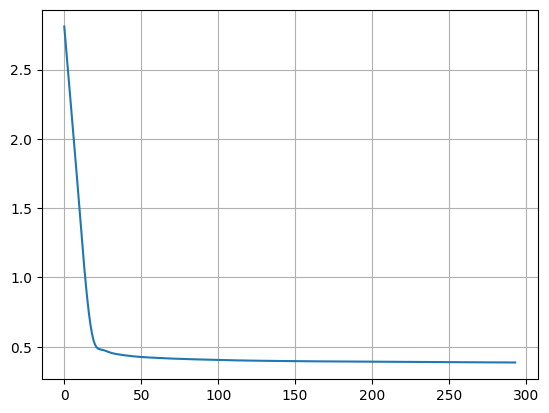

In [ ]:
# График функции потерь без подобранных параметров
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

In [ ]:
# Предсказание нейросети
y_matrix_pred = model3_1.predict(X_matrix_test_MM.values)

In [ ]:
print(f'Коэффициент детерминации для MLPRegressor без подобранных параметров: {r2_score(y_matrix_test, y_matrix_pred):.6f}')
print(f'Среднеквадратичная ошибка для MLPRegressor без подобранных параметров: {np.sqrt(mean_squared_error(y_matrix_test, y_matrix_pred)):.6f}')

Коэффициент детерминации для MLPRegressor без подобранных параметров: -0.037495
Среднеквадратичная ошибка для MLPRegressor без подобранных параметров: 0.940855


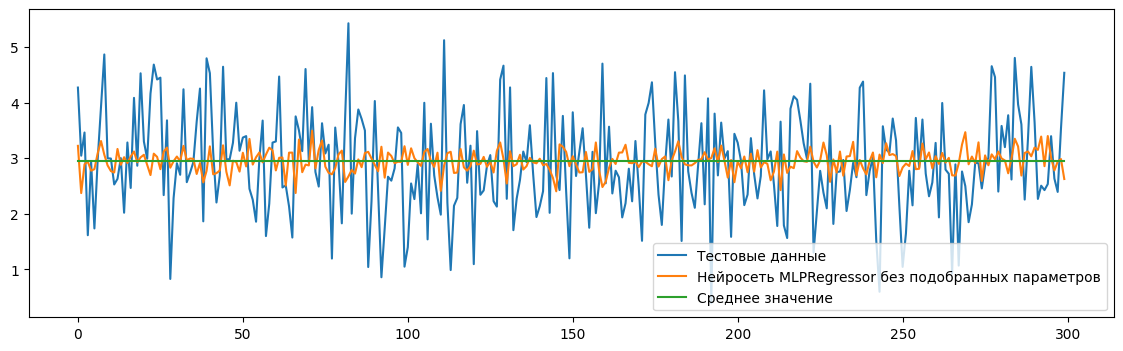

In [ ]:
# График сравнения MLPRegressor без подобранных параметров со средними и тестовыми данными.
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test.values, label='Тестовые данные')
ax.plot(y_matrix_pred, label='Нейросеть MLPRegressor без подобранных параметров')
ax.plot(y_matrix_pred_mean, label='Среднее значение')
ax.legend()
plt.show()

In [ ]:
# Воспользуемся GridSearchCV из библиотеки sklearn для подбора лучших параметров для MLPRegressor.
param_list = {"hidden_layer_sizes": [(12, 12, 12), (8, 12), (24, 24), (24, 24, 24), (8, 8), (16, 16)], 
              "activation": ["identity", "logistic", "tanh", "relu"], 
              "solver": ["lbfgs", "sgd", "adam"], 
              "alpha": [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.05],
              }
model_matrix = MLPRegressor()

grid_search_matrix2 = GridSearchCV(model_matrix, param_list, cv=5, verbose=1, n_jobs=-1)
grid_search_matrix2.fit(X_matrix_train_MM.values, y_matrix_train)
best_params = grid_search_matrix2.best_params_
best_score = grid_search_matrix2.best_score_
print(f'Best params: {best_params}')
print(f'Best score: {best_score}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best params: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (24, 24), 'solver': 'sgd'}
Best score: 0.003242271103923855


In [ ]:
# Настраиваем нейросеть по параметрам GridSearchCV
model_matrix3_1 = MLPRegressor(
    hidden_layer_sizes = (12, 12, 12),
    activation = 'tanh',
    solver='sgd',
    alpha = 0.005,
    max_iter=500,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=42, 
    verbose=True)

In [ ]:
%%time
# Запускаем нейросеть
model_matrix3_1.fit(X_matrix_train_MM.values, y_matrix_train)

Iteration 1, loss = 3.80800975
Validation score: -6.061101
Iteration 2, loss = 2.92686058
Validation score: -3.639664
Iteration 3, loss = 1.91089970
Validation score: -1.670593
Iteration 4, loss = 1.12482074
Validation score: -0.519027
Iteration 5, loss = 0.65779850
Validation score: -0.065802
Iteration 6, loss = 0.46582399
Validation score: -0.030903
Iteration 7, loss = 0.42217986
Validation score: -0.162051
Iteration 8, loss = 0.43756970
Validation score: -0.300257
Iteration 9, loss = 0.46588019
Validation score: -0.379114
Iteration 10, loss = 0.48265508
Validation score: -0.389144
Iteration 11, loss = 0.48074699
Validation score: -0.345520
Iteration 12, loss = 0.46748260
Validation score: -0.278967
Iteration 13, loss = 0.45072294
Validation score: -0.210639
Iteration 14, loss = 0.43357684
Validation score: -0.150984
Iteration 15, loss = 0.42395892
Validation score: -0.103477
Iteration 16, loss = 0.41641078
Validation score: -0.071757
Iteration 17, loss = 0.41291692
Validation score:

MLPRegressor(activation='tanh', alpha=0.005, early_stopping=True,
             hidden_layer_sizes=(12, 12, 12), max_iter=500, random_state=42,
             solver='sgd', validation_fraction=0.3, verbose=True)

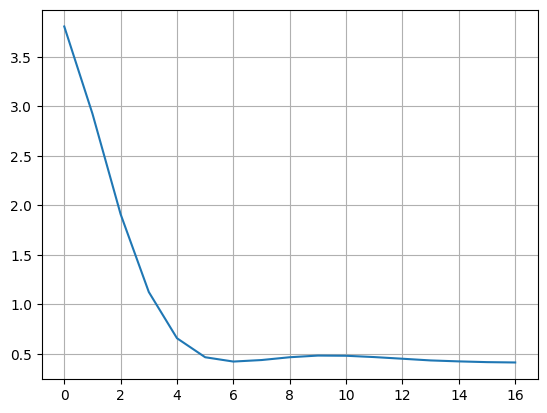

In [ ]:
# График функции потерь MLPRegressor с подобранными параметрами
plt.plot(model_matrix3_1.loss_curve_)
plt.grid(True)
plt.show()

In [ ]:
# Предсказание нейросети MLPRegressor с подобранными параметрами.
y_matrix_pred2 = model_matrix3_1.predict(X_matrix_test_MM.values)
r2_score(y_matrix_test, y_matrix_pred2)

-0.019443503734539735

In [ ]:
#преобразованиe нормализованных данных 
X_matrix_test_original = pd.DataFrame(scaler.inverse_transform(X_matrix_test_MM), columns = X_matrix_test.columns)

In [ ]:
print(f'Коэффициент детерминации для MLPRegressor с подобранными параметрами: {r2_score(y_matrix_test, y_matrix_pred2):.6f}')
print(f'Среднеквадратичная ошибка для MLPRegressor с подобранными параметрами: {np.sqrt(mean_squared_error(y_matrix_test, y_matrix_pred2)):.6f}')

Коэффициент детерминации для MLPRegressor с подобранными параметрами: -0.019444
Среднеквадратичная ошибка для MLPRegressor с подобранными параметрами: 0.932634


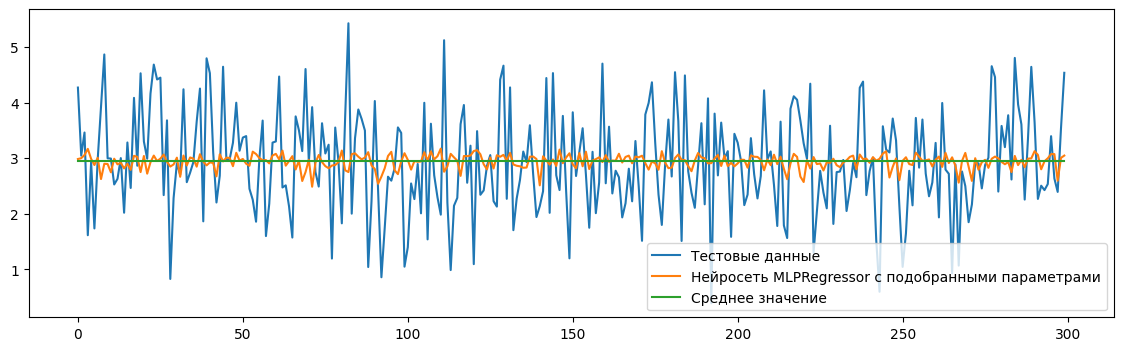

In [ ]:
# График сравнения MLPRegressor с подобранными параметрами относительно средних и тестовых данных.
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test.values, label='Тестовые данные')
ax.plot(y_matrix_pred2, label='Нейросеть MLPRegressor с подобранными параметрами')
ax.plot(y_matrix_pred_mean, label='Среднее значение')
ax.legend()
plt.show()

Нейросеть MLPRegressor с подобранными параметрами показала результат лучше чем модель с параметрами по умолчанию, но результат по прежнему плохой и коэффициент детерминации попрежнему показывает отрицательные значения.

Построим нейронную сеть с помощью библиотеки TensorFlow.

In [ ]:
# Напишим функцию для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха') # Установка подписи для оси x
  axes[0].set_ylabel('MAPE') # Установка подписи для оси y (средняя абсолютная ошибка в процентах)
  axes[0].legend()  # Добавление легенды
  axes[0].grid(True) # Добавление сетки
  axes[1].plot(history['root_mean_squared_error'], label='loss') # График RMSE для обученных данных
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss') # График RMSE для данных кросс-валидации
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [ ]:
# Нормализуем данные

X_matrix_train_ns = tf.keras.layers.Normalization(axis =-1)
X_matrix_train_ns.adapt(np.array(X_matrix_train))

X_matrix_test_ns = tf.keras.layers.Normalization(axis =-1)
X_matrix_test_ns.adapt(np.array(X_matrix_test))

In [ ]:
# Сконфигурируем модель, зададим слои
from tensorflow.keras.layers import Dense
model_matr_tf1 = tf.keras.Sequential([X_matrix_train_ns, layers.Dense(8, activation='tanh'), 
                                                            layers.Dense(16, activation='tanh'), 
                                                            layers.Dense(24, activation='tanh'),
                                                            layers.Dense(1)
                                       ])
# Компиляция модели с оптимизатором, функцией потерь и метриками
model_matr_tf1.compile(optimizer = tf.keras.optimizers.SGD(0.005), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])  

# Посмотрим на архитектуру модели
model_matr_tf1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 706
Trainable params: 681
Non-trainable params: 25
_______________________________________________________

In [ ]:
%%time
#Обучение нейросети
history = model_matr_tf1.fit(
  X_matrix_test, 
  y_matrix_train, 
  epochs=100, 
  validation_split=0.3, 
  verbose=1,
)

Epoch 1/100
7/7 [==============================] - 1s 40ms/step - loss: 8.0409 - root_mean_squared_error: 2.8357 - val_loss: 6.8925 - val_root_mean_squared_error: 2.6254
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 5.6380 - root_mean_squared_error: 2.3744 - val_loss: 4.8139 - val_root_mean_squared_error: 2.1941
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 3.8200 - root_mean_squared_error: 1.9545 - val_loss: 3.3203 - val_root_mean_squared_error: 1.8222
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 2.5596 - root_mean_squared_error: 1.5999 - val_loss: 2.3181 - val_root_mean_squared_error: 1.5225
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 1.7520 - root_mean_squared_error: 1.3236 - val_loss: 1.7054 - val_root_mean_squared_error: 1.3059
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 1.2878 - root_mean_squared_error: 1.1348 - val_loss: 1.3817 - val_root_mean_squ

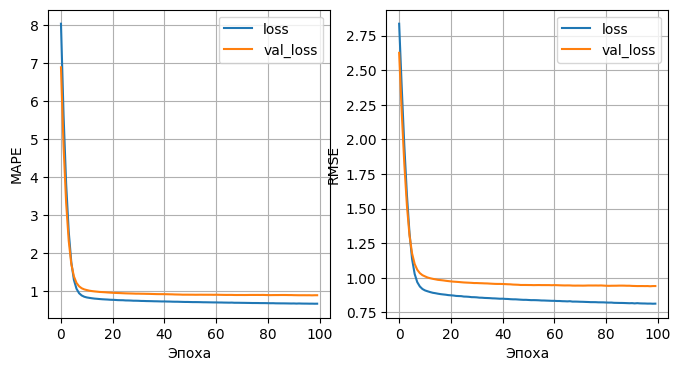

In [ ]:
plot_loss(history.history)

In [ ]:
model_matr_tf1.evaluate(X_matrix_test, y_matrix_test, batch_size=32) # точность модели

10/10 [==============================] - 0s 3ms/step - loss: 0.9217 - root_mean_squared_error: 0.9601


[0.921701967716217, 0.9600530862808228]

In [ ]:
# Предсказание значений.
y3_pred_tf = model_matr_tf1.predict(X_matrix_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
print(f'Коэффициент детерминации для последовательной нейросети: {r2_score(y_matrix_test, y3_pred_tf):.6f}')
print(f'Среднеквадратичная ошибка для последовательной нейросети: {np.sqrt(mean_squared_error(y_matrix_test, y3_pred_tf)):.6f}')

Коэффициент детерминации для последовательной нейросети: -0.080266
Среднеквадратичная ошибка для последовательной нейросети: 0.960053


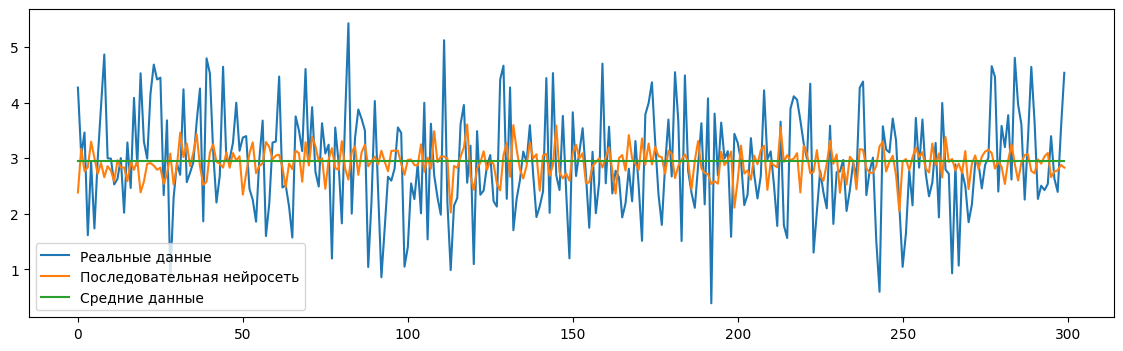

In [ ]:
# Визуализация предсказнных данных последовательной нейроннной сети относительно средних и тестовых данных
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test.values, label='Реальные данные')
ax.plot(y3_pred_tf, label='Последовательная нейросеть')
ax.plot(y_matrix_pred_mean, label='Средние данные')
ax.legend()
plt.show()

In [ ]:
# Создадим последовательную модель с callback, которая останавливает обучение модели, если значение потерь на валидационных данных не улучшается в течение 5 эпох. 
model_matr_tf2 = tf.keras.Sequential([X_matrix_train_ns, layers.Dense(8, activation='tanh'), 
                                                            layers.Dense(16, activation='tanh'),
                                                            layers.Dense(24, activation='tanh'),
                                                            layers.Dense(1)
                                       ])

# Компиляция модели с оптимизатором, функцией потерь и метриками
model_matr_tf2.compile(optimizer = tf.keras.optimizers.SGD(0.005), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])  


# Создание callback-функции для остановки обучения, если значение потерь на валидационных данных не улучшится в течение 5 эпох
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Посмотрим на архитектуру модели
model_matr_tf2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 706
Trainable params: 681
Non-trainable params: 25
_______________________________________________________

In [ ]:
%%time
#Обучение нейросети
history = model_matr_tf2.fit(
  X_matrix_test, 
  y_matrix_train, 
  epochs=100, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[early_stopping_callback])

Epoch 1/100
7/7 [==============================] - 1s 35ms/step - loss: 7.6923 - root_mean_squared_error: 2.7735 - val_loss: 6.1784 - val_root_mean_squared_error: 2.4856
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 4.8265 - root_mean_squared_error: 2.1969 - val_loss: 3.9149 - val_root_mean_squared_error: 1.9786
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 2.9977 - root_mean_squared_error: 1.7314 - val_loss: 2.5107 - val_root_mean_squared_error: 1.5845
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 1.9310 - root_mean_squared_error: 1.3896 - val_loss: 1.7141 - val_root_mean_squared_error: 1.3092
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 1.3647 - root_mean_squared_error: 1.1682 - val_loss: 1.3151 - val_root_mean_squared_error: 1.1468
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 1.0936 - root_mean_squared_error: 1.0458 - val_loss: 1.1328 - val_root_mean_squar

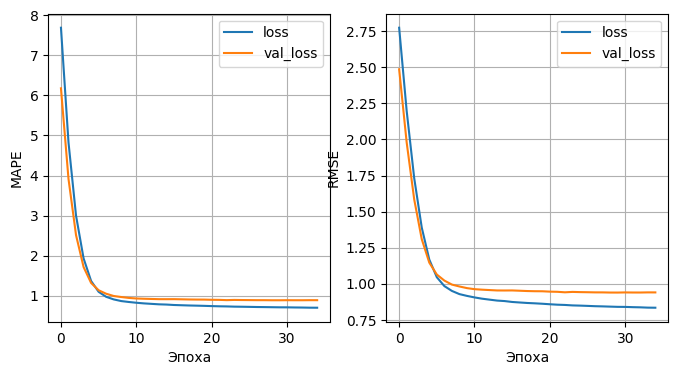

In [ ]:
plot_loss(history.history)

In [ ]:
model_matr_tf2.evaluate(X_matrix_test, y_matrix_test, batch_size=32)

10/10 [==============================] - 0s 2ms/step - loss: 0.8997 - root_mean_squared_error: 0.9485


[0.8996934294700623, 0.9485217332839966]

In [ ]:
# Предсказание значений.
y3_pred_tf2 = model_matr_tf2.predict(X_matrix_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
print(f'Коэффициент детерминации для последовательной неиросети с callback: {r2_score(y_matrix_test, y3_pred_tf2):.6f}')
print(f'Среднеквадратичная ошибка для последовательной неиросети с callback: {np.sqrt(mean_squared_error(y_matrix_test, y3_pred_tf2)):.6f}')

Коэффициент детерминации для последовательной неиросети с callback: -0.054471
Среднеквадратичная ошибка для последовательной неиросети с callback: 0.948522


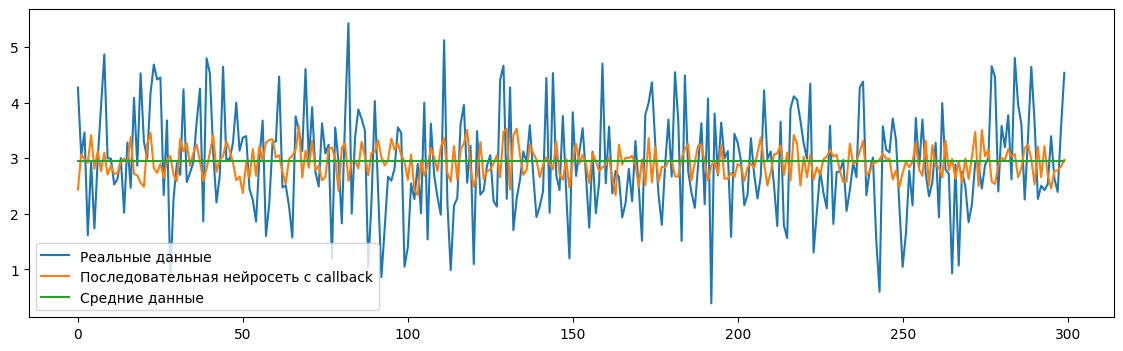

In [ ]:
# Визуализация предсказнных данных последовательной нейроннной сети относительно средних и тестовых данных
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test.values, label='Реальные данные')
ax.plot(y3_pred_tf2, label='Последовательная нейросеть c callback')
ax.plot(y_matrix_pred_mean, label='Средние данные')
ax.legend()
plt.show()

In [ ]:
# Создадим последовательную модель c слоем Dropout и callback.
model_matr_tf3 = tf.keras.Sequential([X_matrix_train_ns, layers.Dense(8, activation='tanh'),
                                                            layers.Dropout(0.2),
                                                            layers.Dense(16, activation='tanh'),
                                                            layers.Dropout(0.3),
                                                            layers.Dense(24, activation='tanh'),
                                                            layers.Dropout(0.5),
                                                            layers.Dense(1)
                                       ])
# Компиляция модели с оптимизатором, функцией потерь и метриками
model_matr_tf3.compile(optimizer = tf.keras.optimizers.SGD(0.005), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()]) 

# Создание callback-функции для остановки обучения, если значение потерь на валидационных данных не улучшится в течение 5 эпох 
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Посмотрим на архитектуру модели
model_matr_tf3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 24)                408       
                                                      

In [ ]:
%%time
#Обучение нейросети
history = model_matr_tf3.fit(
  X_matrix_test, 
  y_matrix_train, 
  epochs=100, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[early_stopping_callback])

Epoch 1/100
7/7 [==============================] - 1s 38ms/step - loss: 8.6318 - root_mean_squared_error: 2.9380 - val_loss: 6.0946 - val_root_mean_squared_error: 2.4687
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 6.0723 - root_mean_squared_error: 2.4642 - val_loss: 4.0524 - val_root_mean_squared_error: 2.0130
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 4.3319 - root_mean_squared_error: 2.0813 - val_loss: 2.7289 - val_root_mean_squared_error: 1.6519
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 3.2283 - root_mean_squared_error: 1.7968 - val_loss: 1.9337 - val_root_mean_squared_error: 1.3906
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 2.4041 - root_mean_squared_error: 1.5505 - val_loss: 1.4253 - val_root_mean_squared_error: 1.1939
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 2.1741 - root_mean_squared_error: 1.4745 - val_loss: 1.1324 - val_root_mean_squa

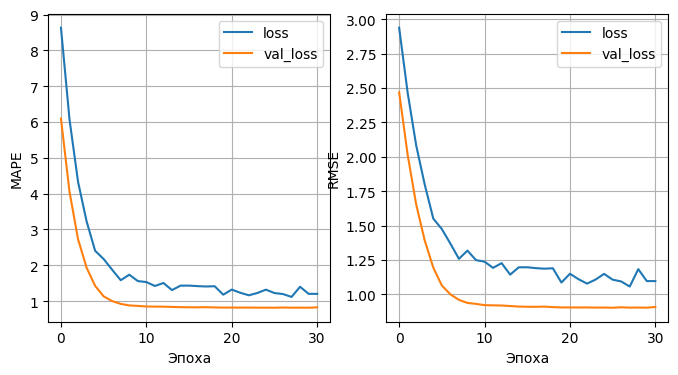

In [ ]:
plot_loss(history.history)

In [ ]:
model_matr_tf3.evaluate(X_matrix_test, y_matrix_test, batch_size=32)

10/10 [==============================] - 0s 3ms/step - loss: 0.8862 - root_mean_squared_error: 0.9414


[0.8862486481666565, 0.9414077997207642]

In [ ]:
# Предсказание значений.
y3_pred_tf3 = model_matr_tf3.predict(X_matrix_test)

10/10 [==============================] - 0s 3ms/step


In [ ]:
print(f'Коэффициент детерминации для последовательной неиросети cо слоем Dropout: {r2_score(y_matrix_test, y3_pred_tf3):.6f}')
print(f'Среднеквадратичная ошибка для последовательной неиросети cо слоем Dropout: {np.sqrt(mean_squared_error(y_matrix_test, y3_pred_tf3)):.6f}')

Коэффициент детерминации для последовательной неиросети cо слоем Dropout: -0.038714
Среднеквадратичная ошибка для последовательной неиросети cо слоем Dropout: 0.941408


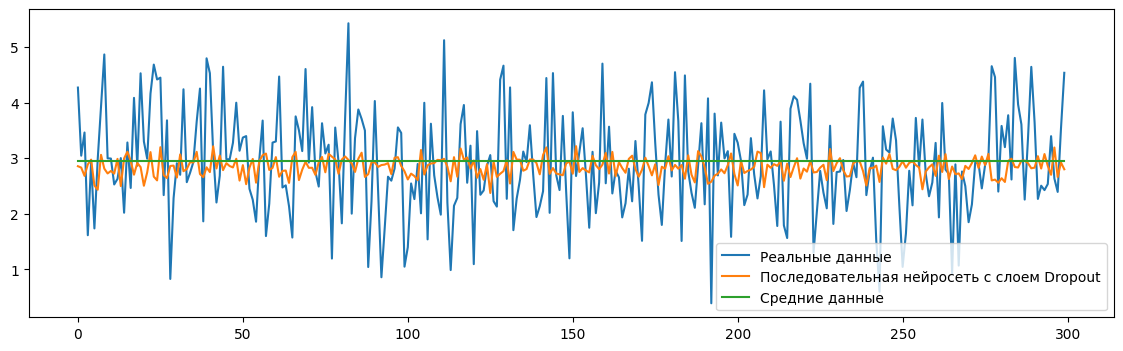

In [ ]:
# Визуализация предсказнных данных последовательной нейроннной сети со слоем Dropout относительно средних и тестовых данных
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test.values, label='Реальные данные')
ax.plot(y3_pred_tf3, label='Последовательная нейросеть c слоем Dropout')
ax.plot(y_matrix_pred_mean, label='Средние данные')
ax.legend()
plt.show()

In [ ]:
r2_mlp_1 = r2_score(y_matrix_test, y_matrix_pred)
rmse_mlp_1 = np.sqrt(mean_squared_error(y_matrix_test, y_matrix_pred))
r2_mlp_2 = r2_score(y_matrix_test, y_matrix_pred2)
rmse_mlp_2 = np.sqrt(mean_squared_error(y_matrix_test, y_matrix_pred2))
r2_sec_1 = r2_score(y_matrix_test, y3_pred_tf)
rmse_sec_1  = np.sqrt(mean_squared_error(y_matrix_test, y3_pred_tf))
r2_sec_2 = r2_score(y_matrix_test, y3_pred_tf2)
rmse_sec_2 = np.sqrt(mean_squared_error(y_matrix_test, y3_pred_tf2))
r2_sec_3 = r2_score(y_matrix_test, y3_pred_tf3)
rmse_sec_3 = np.sqrt(mean_squared_error(y_matrix_test, y3_pred_tf3))

In [ ]:
# Создаём таблицу для сравнения предсказаний модели для расчёта Матрица-наполнитель на тестовых данных.

# Создаём список с названием строк
idx = ['MLPRegressor без подобранных гиперпараметров', 'MLPRegressor с подобранными гиперпараметрами',  
       'Последовательная нейросеть (Keras)', 'Последовательная нейросеть (Keras) с callback', 'Последовательная нейросеть (Keras) с Dropout']
  
# Создаём список с названием столбцов
cols = ['R2', 'RMSE']

# Добавляем значение в строки и столбцы и преобразуем в датафрейм
df_table3 = pd.DataFrame([[r2_mlp_1, rmse_mlp_1], 
                         [r2_mlp_2, rmse_mlp_2], 
                         [r2_sec_1, rmse_sec_1], 
                         [r2_sec_2, rmse_sec_2], 
                         [r2_sec_3, rmse_sec_3]],
                         columns = cols, index = idx)
  
# Отображаем датафрейм в виде тепловой карты
df_table3.style.background_gradient(cmap ='Greens').set_properties(**{'font-size': '14px'})

Сохранение модели для web-приложения на flask предсказывающее с помошью нейронной сети "Соотношение матрица-наполнитель"

In [ ]:
pickle.dump(model_matrix3_1, open('model_matrix3_1.pkl', 'wb'))

In [ ]:
model_load = pickle.load(open('model_matrix3_1.pkl', 'rb'))

In [ ]:
model_load.predict(X_matrix_test)

array([1.2639441 , 2.46865511, 1.51676304, 1.51676304, 2.46865511,
       1.27867741, 1.51676304, 2.46865511, 2.46865511, 2.18049152,
       1.2639441 , 1.51676305, 2.46865511, 2.46865511, 2.46865511,
       2.49832499, 1.51676304, 2.64705456, 2.46865511, 1.2639441 ,
       2.64705456, 1.51676308, 1.90447682, 2.64705456, 2.46865511,
       2.18049152, 2.46865511, 2.46865511, 1.51676304, 2.46865511,
       2.46865511, 2.18049152, 2.64467888, 2.46865511, 2.46865511,
       2.46865511, 2.46865511, 1.2639441 , 1.2639441 , 2.43796487,
       2.46865511, 1.2639441 , 2.46865511, 2.46865511, 1.2639441 ,
       2.46865511, 1.2639441 , 1.2639441 , 2.18104896, 1.27867741,
       2.64467888, 1.51676304, 1.2639441 , 2.18049152, 2.46865511,
       2.64467888, 2.64467888, 2.46865511, 2.46865511, 2.64705456,
       2.18049152, 2.46865511, 2.46854851, 2.64705456, 2.64705456,
       2.46865511, 2.46865511, 2.64467888, 1.27870531, 2.46865511,
       2.45348424, 1.51676304, 1.2639441 , 2.46865511, 2.46865

In [ ]:
score = model_matrix3_1.score(X_matrix_test, y_matrix_test)
print("Score:", score)

Score: -0.9448848339976947


In [ ]:
# Вход
X_matrix_test.iloc[19, :].values.astype(str)

array(['2145.15015620221', '220.514857006646', '104.65477440559',
       '26.258185440362', '238.599428952708', '126.864940640931',
       '74.1485701340867', '2607.26130402757', '205.832189058552', '0.0',
       '3.11194483272504', '45.0970841976533'], dtype='<U32')